**PROJECT :: FACTORS INFLUENCING DIABETES DISEASE:**


**Case study** : Factors affecting diabetes disease using various model like:
 

*   Logistic Regression(sklearn and Stats model)
*   Decision Tree

*   Random Forest
*   XGBoost Algorithm

**CONTEXT**:

*   Diabetes is among the most prevalent chronic diseases, impacting millions of individuals each year.
*    Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy.


*   Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes.

**PROBLEM STATEMENT:**
To predict whether the individuals is having diabetes or not using previous patient details and its a classificaton problem.

**PROBLEM CONTEXT:** 

*   Does various predicting factors really affect diabetes disease?
*   What are the variables actually affecting diabetes disease

*   what are the variables not affecting diabetes disease
*   Does diabetes disease depends on various variables/factors

**Attributes/Variables Information:**

1. Diabetes_Binary: Whether the person is a diabetes patient or not (1=yes,0=no)
2.HighBP : person has high BP or not(0=no highbp,1= yes highbp)
3.Highchol : 1=yes highchol,0=no highchol
4.Cholcheck : Cholestrol check in 5 years (0=no,1=yes)
5.BMI : Body mass Index 
6.Smoker : Have you smoked at least 100 cigarettes in your entire life? 
0 = no 1 = yes
7.Stroke : Have u had stroke atleast once(0 = no 1 = yes)
8.HeartDiseaseorAttack : coronary heart disease (CHD) or myocardial infarction (MI) (0 = no 1 = yes)
9.PhysActivity : physical activity in past 30 days - not including job (0 = no 1 = yes)
10.Fruits : Consumes Fruit 1 or more times per day (0 = no 1 = yes)
11.Veggies : Consumes Vegetables 1 or more times per day (0 = no 1 = yes)
12.HvyAlcoholConsump : Alcohol consumption rate ( 0 = no 1 = yes)
13.AnyHealthcare : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. (0 = no 1 = yes)
14.NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0 = no 1 = yes)
15.GenHlth : Would you say that in general your health is: scale 1-5,  1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
16.MentHlth : days of poor mental health scale 1-30 days
17.PhysHlth : physical illness or injury days in past 30 days scale 1-30
18.DiffWalk : Do you have serious difficulty walking or climbing stairs? (0 = no 1 = yes)
19.Sex : Gender (0 = female 1 = male)
20.Age : Age of pereson based on scale,1 = 18-24 ,9 = 60-64 ,13 = 80 or older
21.Education : Education level ,scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.
22.Income : Income scale ,scale 1-8 1 = less than  10,000 ,5 = less than 35,000 8 = 75,000 or more in dollars.

**Steps involved in model Building:**
 

*   Understanding the problem statement
*   Overview of the data

*   Data preparation / cleaning
*   Model biulding / choose model,trian and evaluate


*   Conclusion based on model

In [ ]:
#importing the drive for required file
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/Colab Notebooks/PROJECT'

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/PROJECT


In [ ]:
#importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#reading the original data using csv file
data = pd.read_csv("diabetes.csv")
data

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           1.0     0.0  ...            1.0   
1                       0.0           0.0     1.0  ...            1.0   
2                       0.0           1.0     1.0  ...            1.0   
3                       0.0           1.0     1.0  ...            1.0   
4                       0.0           1.0     1.0  ...            1.0   
...                     ...           ...     ...  ...            ...   
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0              0.0      3.0       5.0      30.0       0.0  1.0   4.0   
1              0.0      3.0       0.0       0.0       0.0  1.0  12.0   
2              0.0      1.0       0.0      10.0       0.0  1.0  13.0   
3              0.0      3.0       0.0       3.0       0.0  1.0  11.0   
4              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
...            ...      ...       ...       ...       ...  ...   ...   
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
0            6.0     8.0  
1            6.0     8.0  
2            6.0     8.0  
3            6.0     8.0  
4            5.0     8.0  
...          ...     ...  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[70692 rows x 22 columns]

In [ ]:
#making the shallow copy of the data for EDA and data analysis 
#shalllow copy is made bcz  if any changes done that should not change in original data
df = data.copy()
df

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           1.0     0.0  ...            1.0   
1                       0.0           0.0     1.0  ...            1.0   
2                       0.0           1.0     1.0  ...            1.0   
3                       0.0           1.0     1.0  ...            1.0   
4                       0.0           1.0     1.0  ...            1.0   
...                     ...           ...     ...  ...            ...   
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0              0.0      3.0       5.0      30.0       0.0  1.0   4.0   
1              0.0      3.0       0.0       0.0       0.0  1.0  12.0   
2              0.0      1.0       0.0      10.0       0.0  1.0  13.0   
3              0.0      3.0       0.0       3.0       0.0  1.0  11.0   
4              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
...            ...      ...       ...       ...       ...  ...   ...   
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
0            6.0     8.0  
1            6.0     8.0  
2            6.0     8.0  
3            6.0     8.0  
4            5.0     8.0  
...          ...     ...  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[70692 rows x 22 columns]

In [ ]:
#checking the data of first five rows using head option
#By default head shows only five rows but u can get any numbers of rows using df.head(number)
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

In [ ]:
#checking the data of last five rows using tail option
#By default tail shows only five rows but u can get any numbers of rows using df.tail(number)
df.tail()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[5 rows x 22 columns]

In [ ]:
#getting all the information of dataset using info command 
#info command gives
  #1 No of rows 
  #2 No of columns 
  #3 No of float,int,object columns 
  #4 Datatype of all the columns
  #5 Data used for storing 
  #6 Notnull values of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

**Observations:**


*   There are 70692 rows and 22columns
*   All the variables/columns are  label encoded , so only numeric columns   are seen
*   Data cleaning is not required as there are  no null values,
*   Dependent variable is Diabetes_binary.

In [ ]:
# checking the columns names 
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
#selecting only object columns
object_cols=df.select_dtypes(include=['object']).columns.tolist()
object_cols

[]

In [ ]:
#selecting only numeric columns 
numeric_cols=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [ ]:
#checking the shape of data
df.shape

(70692, 22)

In [ ]:
#Filtering the missing values 
#checking the null values in dataset using df.isnull() command 
#to_list  creates the list of the output of null values with the sum of nullvalues of every column
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
#percentage of null values..
df.isnull().sum()* 100 / len(df)

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

**Summary of the data:**

In [ ]:
#include all includes all datatype columns in dataset like object or float or int columns
#describe is used for getting every info of columns like
 #If the column datatype is object it shows all the unique values,topmost value,frequency of column
 #If the column datatype is number(float,int) it shows mean,median,standard deviation,quantile of every column
df.describe(include="all")

Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000      0.000000      0.000000              0.000000   
50%       29.000000      0.000000      0.000000              0.000000   
75%       33.000000      1.000000      0.000000              0.000000   
max       98.000000      1.000000      1.000000              1.000000   

       PhysActivity        Fruits  ...  AnyHealthcare   NoDocbcCost  \
count  70692.000000  70692.000000  ...   70692.000000  70692.000000   
mean       0.703036      0.611795  ...       0.954960      0.093914   
std        0.456924      0.487345  ...       0.207394      0.291712   
min        0.000000      0.000000  ...       0.000000      0.000000   
25%        0.000000      0.000000  ...       1.000000      0.000000   
50%        1.000000      1.000000  ...       1.000000      0.000000   
75%        1.000000      1.000000  ...       1.000000      0.000000   
max        1.000000      1.000000  ...       1.000000      1.000000   

            GenHlth      MentHlth      PhysHlth      DiffWalk           Sex  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       2.837082      3.752037      5.810417      0.252730      0.456997   
std        1.113565      8.155627     10.062261      0.434581      0.498151   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        3.000000      0.000000      0.000000      0.000000      0.000000   
75%        4.000000      2.000000      6.000000      1.000000      1.000000   
max        5.000000     30.000000     30.000000      1.000000      1.000000   

                Age     Education        Income  
count  70692.000000  70692.000000  70692.000000  
mean       8.584055      4.920953      5.698311  
std        2.852153      1.029081      2.175196  
min        1.000000      1.000000      1.000000  
25%        7.000000      4.000000      4.000000  
50%        9.000000      5.000000      6.000000  
75%       11.000000      6.000000      8.000000  
max       13.000000      6.000000      8.000000  

[8 rows x 22 columns]

In [ ]:
#checking the datatype of all columns
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

##Unique Values of every column:

In [ ]:
df.Diabetes_binary.unique()

array([0., 1.])

In [ ]:
df.HighBP.unique()

array([1., 0.])

In [ ]:
df.HighChol.unique()

array([0., 1.])

In [ ]:
df.CholCheck.unique()

array([1., 0.])

In [ ]:
df.BMI.unique()

array([26., 28., 29., 18., 31., 32., 27., 24., 21., 58., 30., 20., 22.,
       38., 40., 25., 36., 47., 19., 37., 41., 23., 34., 35., 42., 17.,
       33., 44., 15., 52., 69., 56., 45., 39., 92., 53., 98., 50., 46.,
       79., 48., 16., 63., 72., 54., 49., 68., 43., 84., 73., 76., 55.,
       51., 75., 57., 60., 12., 77., 82., 67., 71., 61., 14., 81., 59.,
       86., 13., 87., 65., 95., 89., 62., 64., 66., 85., 70., 83., 80.,
       78., 74.])

In [ ]:
df.Smoker.unique()

array([0., 1.])

In [ ]:
df.Stroke.unique()

array([0., 1.])

In [ ]:
df.HeartDiseaseorAttack.unique()

array([0., 1.])

In [ ]:
df.PhysActivity.unique()

array([1., 0.])

In [ ]:
df.Fruits.unique()

array([0., 1.])

In [ ]:
df.Veggies.unique()

array([1., 0.])

In [ ]:
df.HvyAlcoholConsump.unique()

array([0., 1.])

In [ ]:
df.AnyHealthcare.unique()

array([1., 0.])

In [ ]:
df.NoDocbcCost.unique()

array([0., 1.])

In [ ]:
df.GenHlth.unique()

array([3., 1., 2., 4., 5.])

In [ ]:
df.MentHlth.unique()

array([ 5.,  0.,  7.,  3.,  4.,  2., 30., 20.,  1., 15., 10., 25., 14.,
       28.,  6., 29., 26., 12., 16., 22., 13.,  8.,  9., 21., 18., 17.,
       27., 24., 23., 11., 19.])

In [ ]:
df.PhysHlth.unique()

array([30.,  0., 10.,  3.,  6.,  4., 15.,  1.,  2., 14.,  7., 25., 21.,
       20.,  5.,  8., 22., 23., 29., 12., 18., 28., 26., 24., 27., 11.,
       13., 16., 17.,  9., 19.])

In [ ]:
df.DiffWalk.unique()

array([0., 1.])

In [ ]:
df.Sex.unique()

array([1., 0.])

In [ ]:
df.Education.unique()

array([6., 5., 4., 3., 2., 1.])

In [ ]:
df.Income.unique()

array([8., 7., 6., 3., 4., 1., 5., 2.])

In [ ]:
df.Age.unique()

array([ 4., 12., 13., 11.,  8.,  1.,  6.,  3.,  7., 10.,  9.,  5.,  2.])

**Observations:**


*   Every columns unique values are found and all columns have  expected normal values,
*   No garbage data is found in any columns.

##Univariate Analysis:

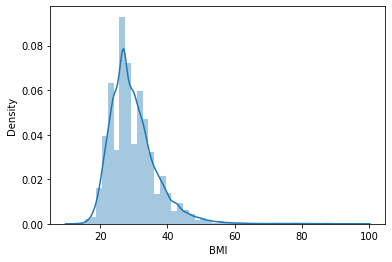

In [ ]:
sns.distplot(df.BMI)

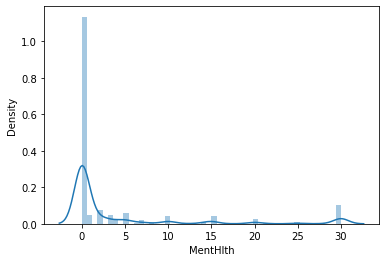

In [ ]:
sns.distplot(df.MentHlth)

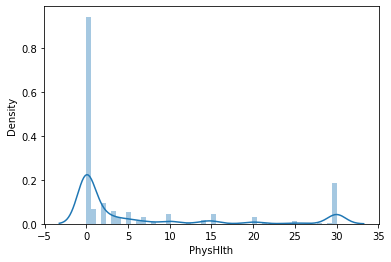

In [ ]:
sns.distplot(df.PhysHlth)

In [ ]:
#checking the value counts of dependent variable..
df.Diabetes_binary.value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [ ]:
sns.countplot(df.Diabetes_binary,data=df,palette = "rainbow")
plt.show()

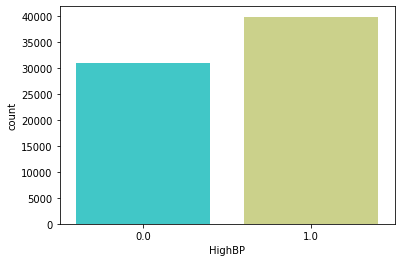

In [ ]:
sns.countplot(df.HighBP,data=df,palette = "rainbow")
plt.show()

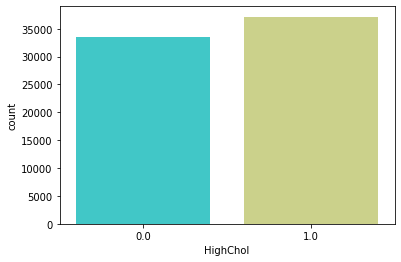

In [ ]:
sns.countplot(df.HighChol,data=df,palette = "rainbow")
plt.show()

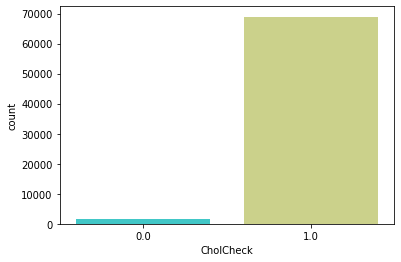

In [ ]:
sns.countplot(df.CholCheck,data=df,palette = "rainbow")
plt.show()

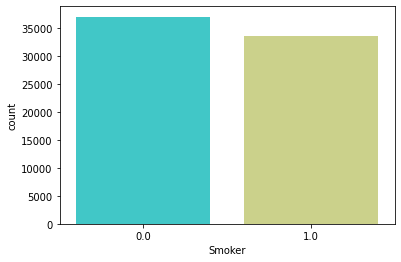

In [ ]:
sns.countplot(df.Smoker,data=df,palette = "rainbow")
plt.show()

In [ ]:
sns.countplot(df.Stroke,data=df,palette = "rainbow")
plt.show()

In [ ]:
sns.countplot(df.HeartDiseaseorAttack,data=df,palette = "rainbow")
plt.show()

In [ ]:
sns.countplot(df.AnyHealthcare,data=df,palette = "rainbow")
plt.show()

In [ ]:
sns.countplot(df.PhysActivity,data=df,palette = "rainbow")
plt.show()

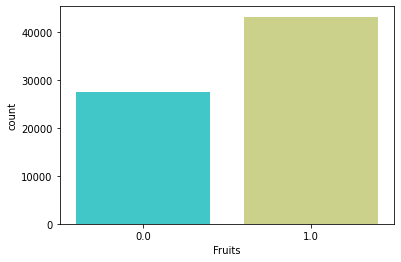

In [ ]:
sns.countplot(df.Fruits,data=df,palette = "rainbow")
plt.show()

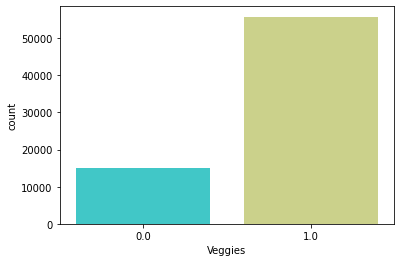

In [ ]:
sns.countplot(df.Veggies,data=df,palette = "rainbow")
plt.show()

In [ ]:
sns.countplot(df.HvyAlcoholConsump,data=df,palette = "rainbow")
plt.show()

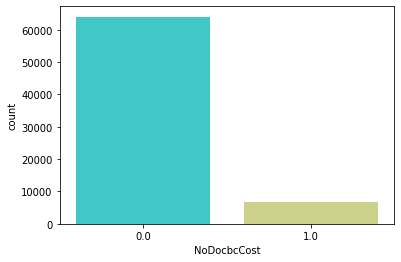

In [ ]:
sns.countplot(df.NoDocbcCost,data=df,palette = "rainbow")
plt.show()

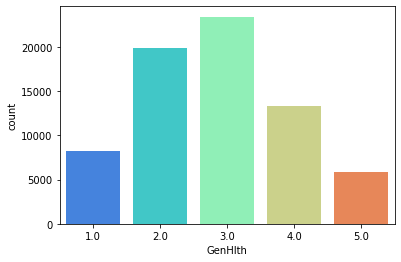

In [ ]:
sns.countplot(df.GenHlth,data=df,palette = "rainbow")
plt.show()

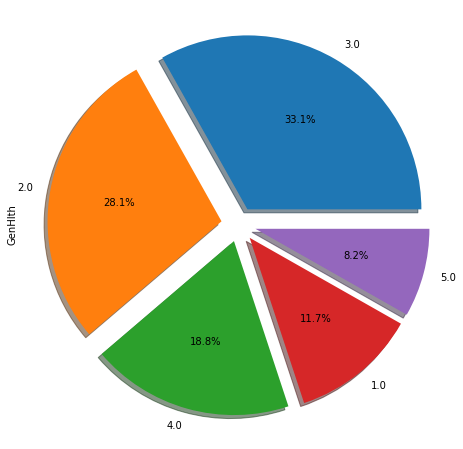

In [ ]:
#plotting pie chart for GenHlth column.
plt.figure(figsize=[8,8])
df['GenHlth'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

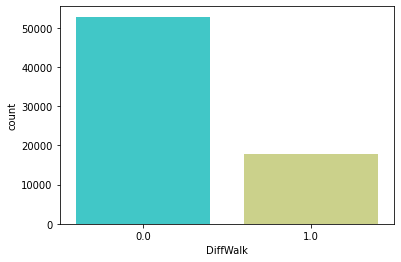

In [ ]:
sns.countplot(df.DiffWalk,data=df,palette = "rainbow")
plt.show()

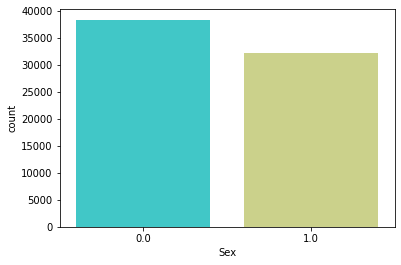

In [ ]:
sns.countplot(df.Sex,data=df,palette = "rainbow")
plt.show()

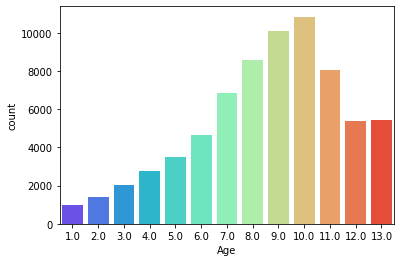

In [ ]:
sns.countplot(df.Age,data=df,palette = "rainbow")
plt.show()

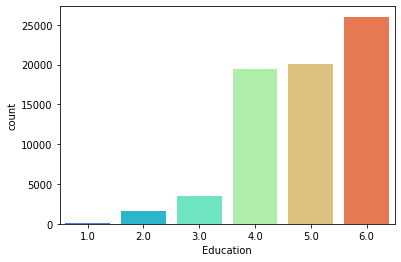

In [ ]:
sns.countplot(df.Education,data=df,palette = "rainbow")
plt.show()

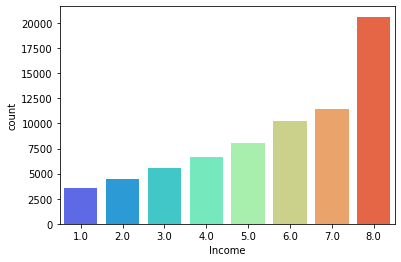

In [ ]:
sns.countplot(df.Income,data=df,palette = "rainbow")
plt.show()

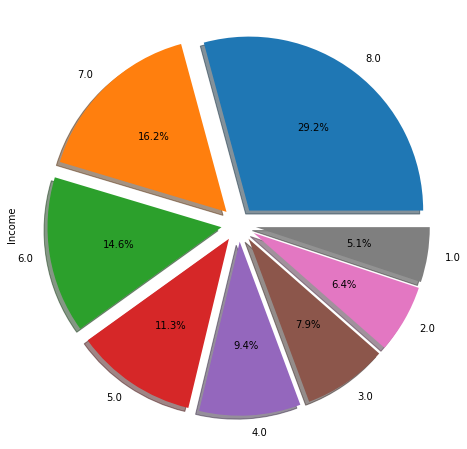

In [ ]:
#plotting pie chart for income column.
plt.figure(figsize=[8,8])
df['Income'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

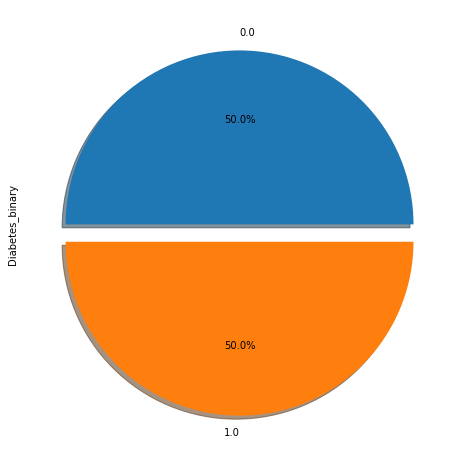

In [ ]:
#plotting pie chart for target variable..
plt.figure(figsize=[8,8])
df['Diabetes_binary'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

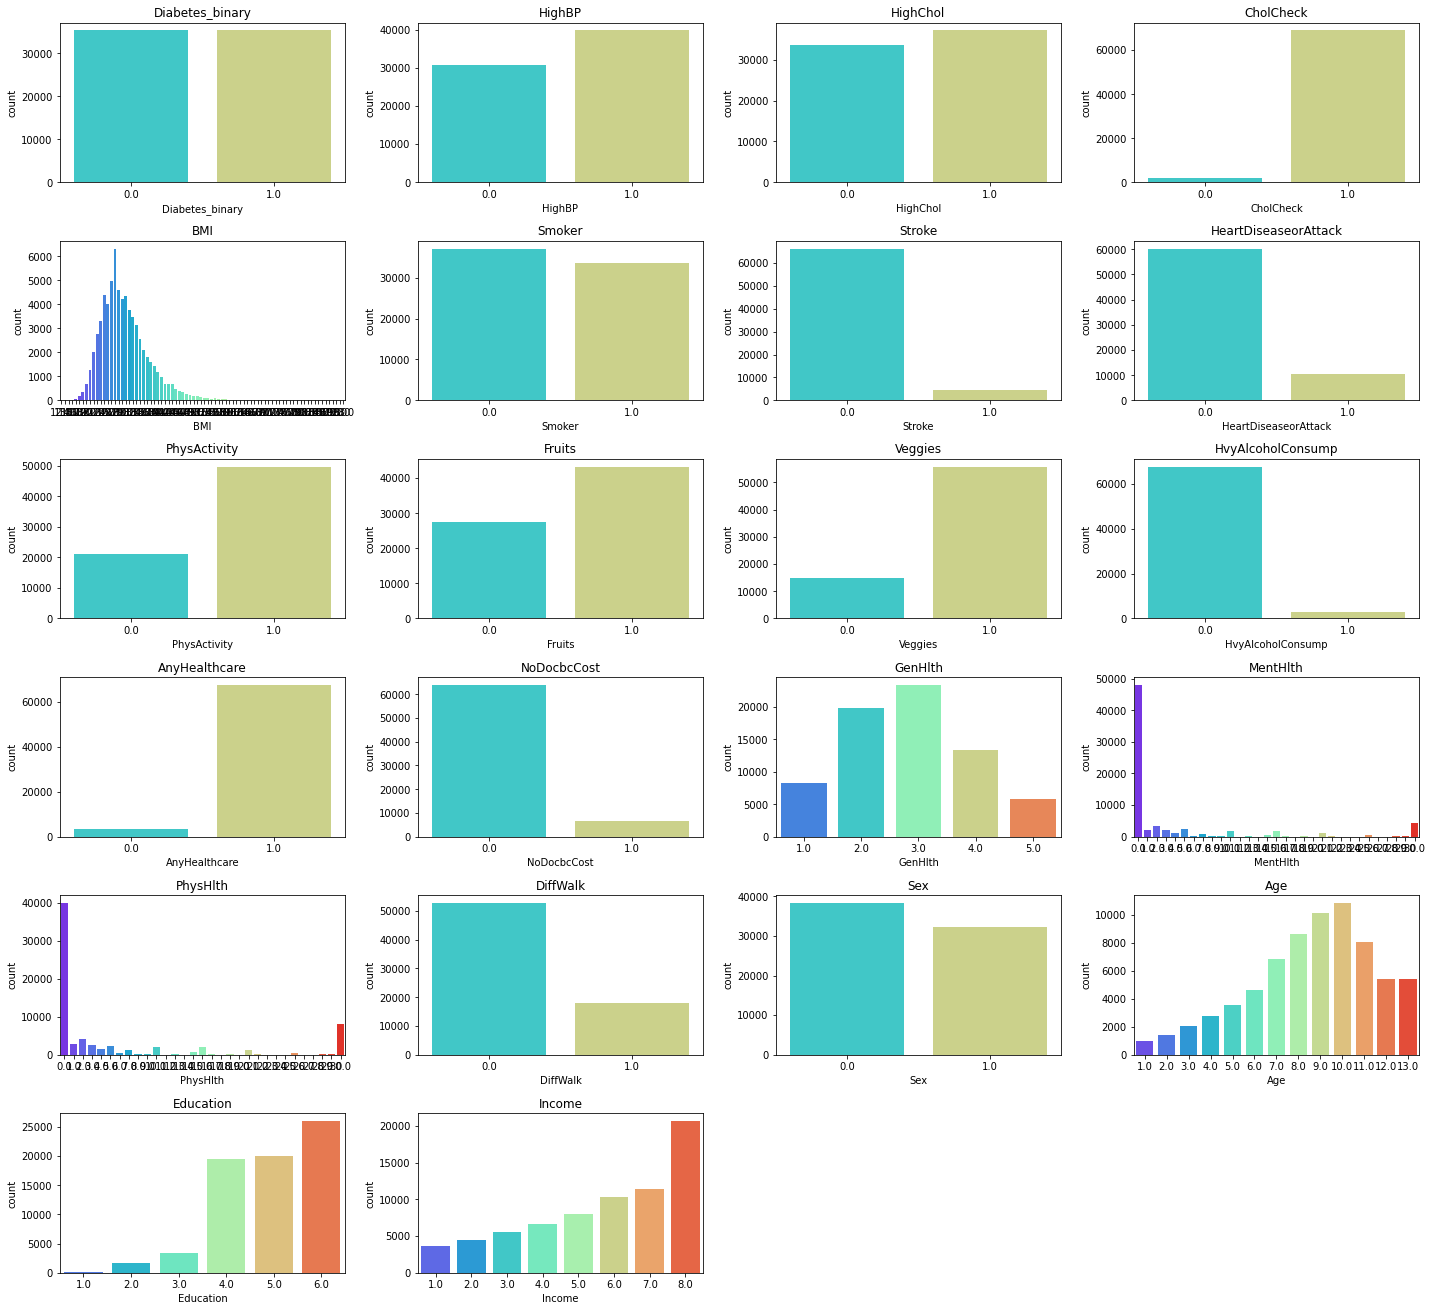

In [ ]:
plt.figure(figsize=(20,30))

for i , variable in enumerate (df):
    plt.subplot(10,4,i+1)
    sns.countplot(df[variable],data=df,palette = "rainbow")
    plt.tight_layout()
    plt.title(variable)

##Bivariate Analysis:

For discrete values we plot barplots:

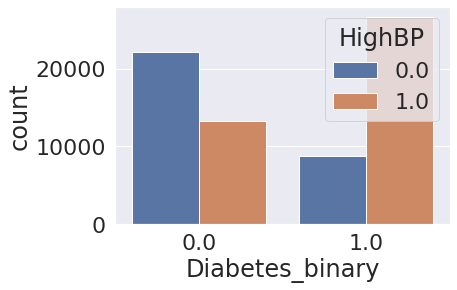

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.HighBP)

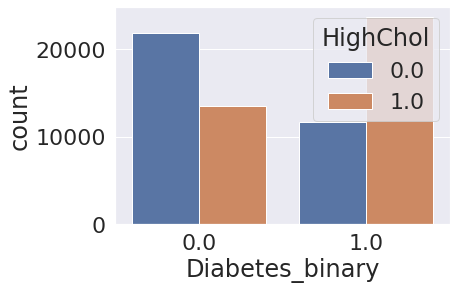

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.HighChol)

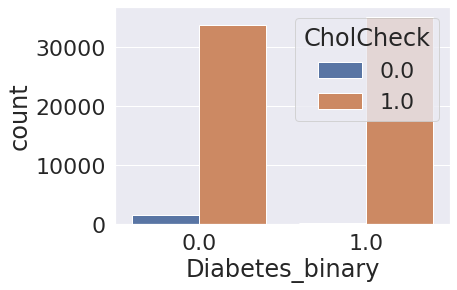

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.CholCheck)

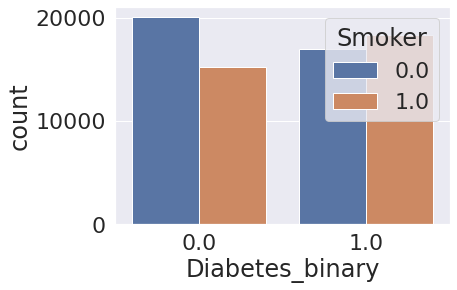

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.Smoker)

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.Stroke)

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.HeartDiseaseorAttack)

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.PhysActivity)

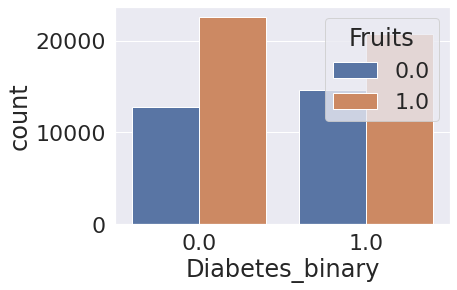

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.Fruits)

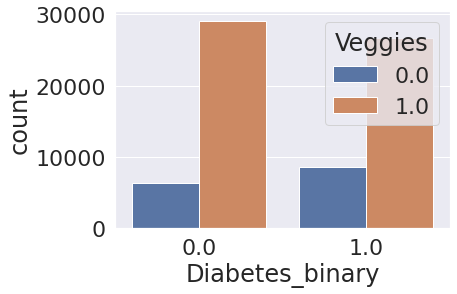

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.Veggies)

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.HvyAlcoholConsump)

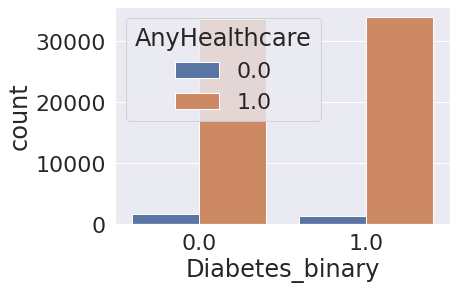

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.AnyHealthcare)

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.NoDocbcCost)

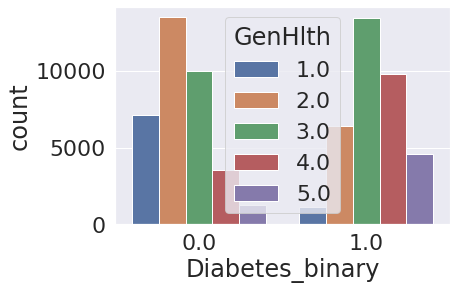

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.GenHlth)

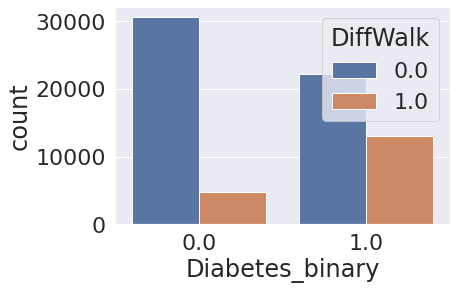

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.DiffWalk)

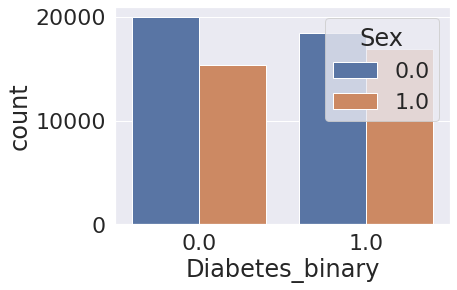

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.Sex)

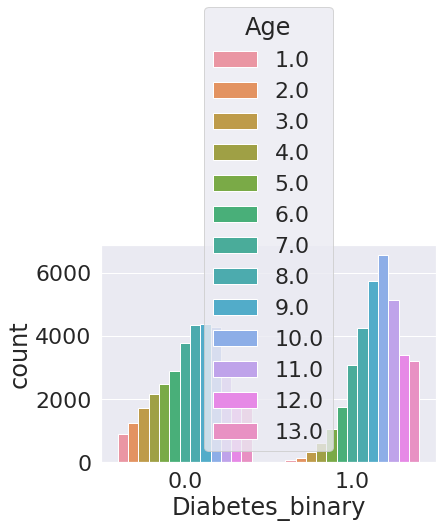

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.Age)

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.Education)

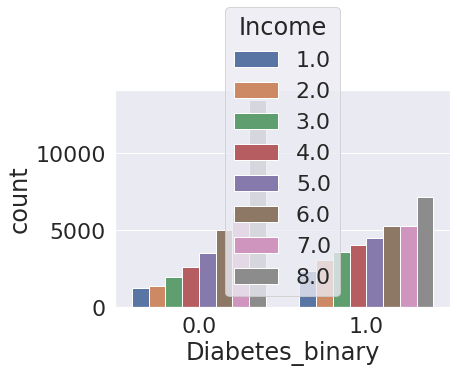

In [ ]:
sns.countplot(df.Diabetes_binary,hue=df.Income)

For continous values we plot boxplots:

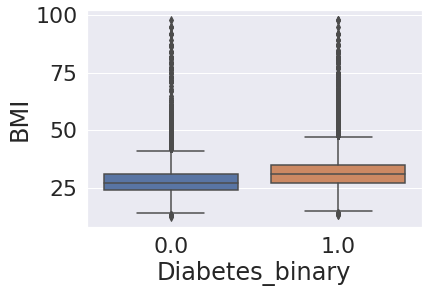

In [ ]:
sns.boxplot(y =df.BMI , x = df.Diabetes_binary )

In [ ]:
sns.boxplot(y =df.MentHlth , x = df.Diabetes_binary )

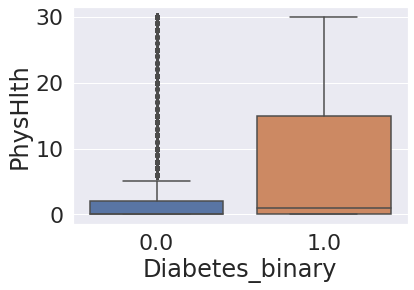

In [ ]:
sns.boxplot(y =df.PhysHlth , x = df.Diabetes_binary )

##Multivariate Analysis:

In [ ]:
#correlation of every columns
#diagonal value will be always eqaul to 1 bcz correlation of its own value is always 1.
df.corr()

Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.381516  0.289213   0.115382   
HighBP                       0.381516  1.000000  0.316515   0.103283   
HighChol                     0.289213  0.316515  1.000000   0.085981   
CholCheck                    0.115382  0.103283  0.085981   1.000000   
BMI                          0.293373  0.241019  0.131309   0.045648   
Smoker                       0.085999  0.087438  0.093398  -0.004331   
Stroke                       0.125427  0.129060  0.099786   0.022529   
HeartDiseaseorAttack         0.211523  0.210750  0.181187   0.043497   
PhysActivity                -0.158666 -0.136102 -0.090453  -0.008249   
Fruits                      -0.054077 -0.040852 -0.047384   0.017384   
Veggies                     -0.079293 -0.066624 -0.042836   0.000349   
HvyAlcoholConsump           -0.094853 -0.027030 -0.025443  -0.027146   
AnyHealthcare                0.023191  0.035764  0.031532   0.106800   
NoDocbcCost                  0.040977  0.026517  0.033199  -0.062669   
GenHlth                      0.407612  0.320540  0.237778   0.059213   
MentHlth                     0.087029  0.064294  0.083881  -0.010660   
PhysHlth                     0.213081  0.173922  0.142610   0.034540   
DiffWalk                     0.272646  0.234784  0.162043   0.044430   
Sex                          0.044413  0.040819  0.017324  -0.007991   
Age                          0.278738  0.338132  0.240338   0.101743   
Education                   -0.170481 -0.141643 -0.084386  -0.008695   
Income                      -0.224449 -0.187657 -0.107777   0.007550   

                           BMI    Smoker    Stroke  HeartDiseaseorAttack  \
Diabetes_binary       0.293373  0.085999  0.125427              0.211523   
HighBP                0.241019  0.087438  0.129060              0.210750   
HighChol              0.131309  0.093398  0.099786              0.181187   
CholCheck             0.045648 -0.004331  0.022529              0.043497   
BMI                   1.000000  0.011551  0.022931              0.060355   
Smoker                0.011551  1.000000  0.064658              0.124418   
Stroke                0.022931  0.064658  1.000000              0.223394   
HeartDiseaseorAttack  0.060355  0.124418  0.223394              1.000000   
PhysActivity         -0.170936 -0.079823 -0.079985             -0.098223   
Fruits               -0.084505 -0.074811 -0.008996             -0.019436   
Veggies              -0.056528 -0.029926 -0.047601             -0.036315   
HvyAlcoholConsump    -0.058232  0.077835 -0.023395             -0.037130   
AnyHealthcare        -0.013417 -0.012939  0.006484              0.015687   
NoDocbcCost           0.065832  0.035799  0.036198              0.036029   
GenHlth               0.267888  0.152416  0.189447              0.275868   
MentHlth              0.104682  0.091257  0.087303              0.075057   
PhysHlth              0.161862  0.120698  0.164488              0.198416   
DiffWalk              0.246094  0.119789  0.192266              0.232611   
Sex                   0.000827  0.112125  0.003822              0.098161   
Age                  -0.038648  0.105424  0.123879              0.221878   
Education            -0.100233 -0.140966 -0.073926             -0.096559   
Income               -0.124878 -0.104725 -0.136577             -0.146748   

                      PhysActivity    Fruits  ...  AnyHealthcare  NoDocbcCost  \
Diabetes_binary          -0.158666 -0.054077  ...       0.023191     0.040977   
HighBP                   -0.136102 -0.040852  ...       0.035764     0.026517   
HighChol                 -0.090453 -0.047384  ...       0.031532     0.033199   
CholCheck                -0.008249  0.017384  ...       0.106800    -0.062669   
BMI                      -0.170936 -0.084505  ...      -0.013417     0.065832   
Smoker                   -0.079823 -0.074811  ...      -0.012939     0.035799   
Stroke                   -0.079985 -0.008996  ...

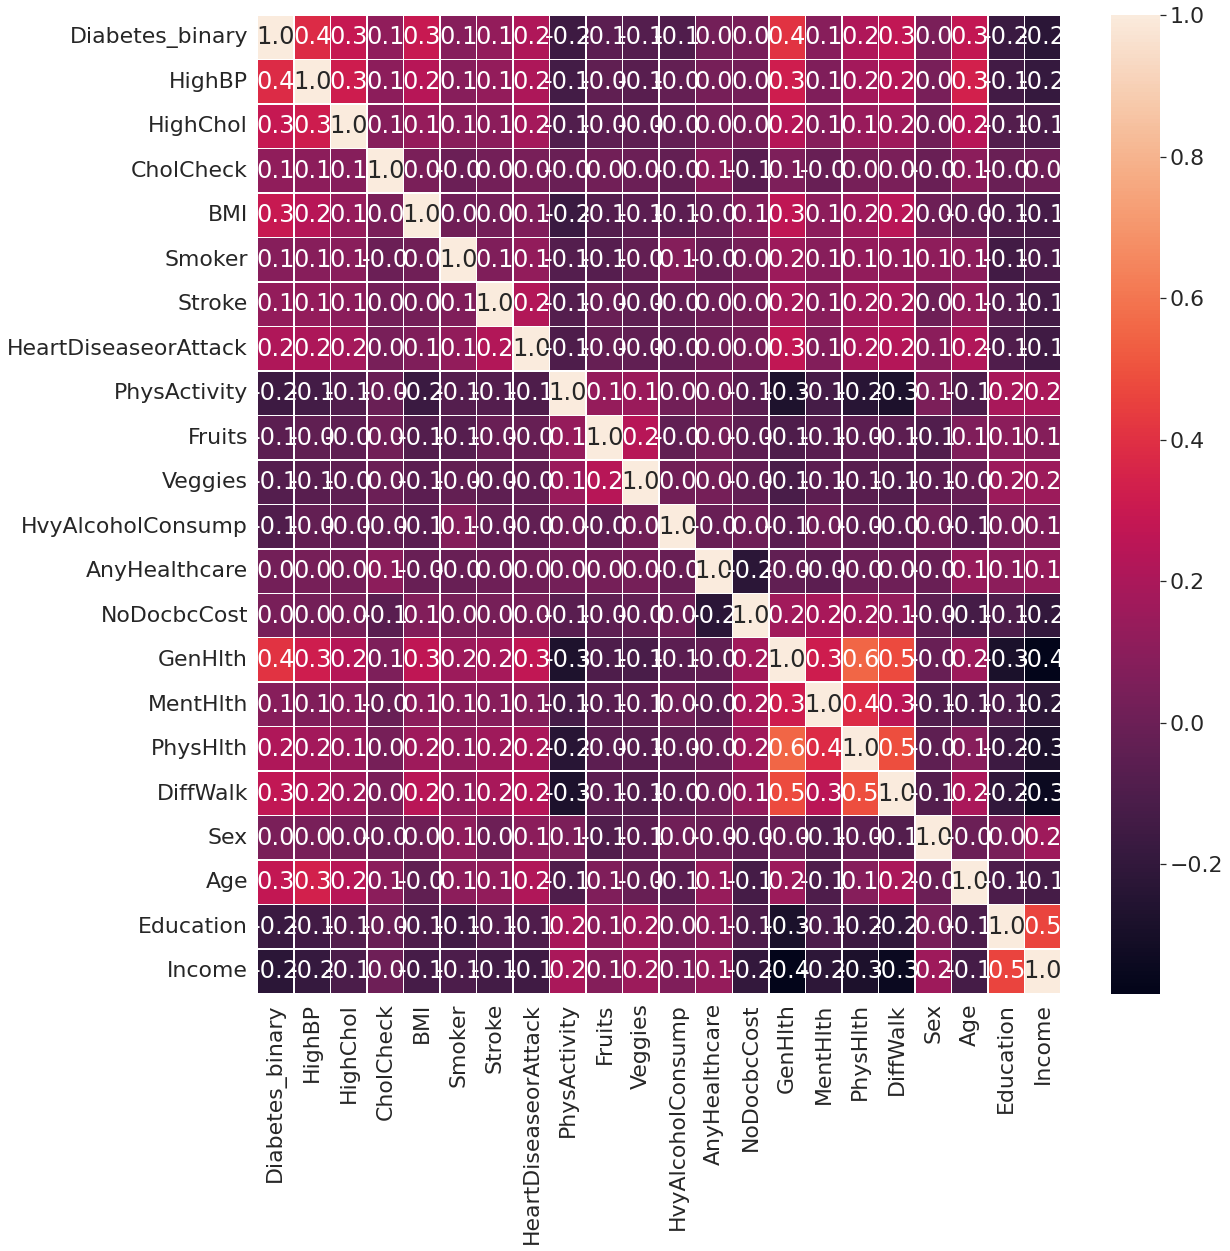

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
#let us write a function that will help us create boxplot and histogram for any input numerical variable
#this function takes numerical column as input and return boxplots and histogram for the variable

def histogram_boxplot(feature,figsize=(15,10),bins=None):
  """ Boxplot and histogram combined 
  feature :1-d feature array
  figsize:size of fig (default(9,8))
  bins: number of bins (default None/auto)
  """
  sns.set(font_scale=2) #setting the font scale of the seaborn
  f2,(ax_box2,ax_hist2)=plt.subplots(nrows=2, #number of rows of the subplot grid=2
                                     sharex=True, #x axis will be shared among all subplots
                                     gridspec_kw={"height_ratios":(0.25,0.75)},
                                     figsize=figsize
                                     ) #creating the 2 subplots
  sns.boxplot(feature,ax=ax_box2,showmeans=True,color="red") #box plot will be created and a star
  sns.distplot(feature,kde=False,ax=ax_hist2,bins=bins) if bins else sns.distplot(feature,kde=False,ax=ax_hist2)

  ax_hist2.axvline(np.mean(feature),color="g",linestyle="--") #add mean to the histogram
  ax_hist2.axvline(np.median(feature),color="black",linestyle="-") #add median to the histogram,

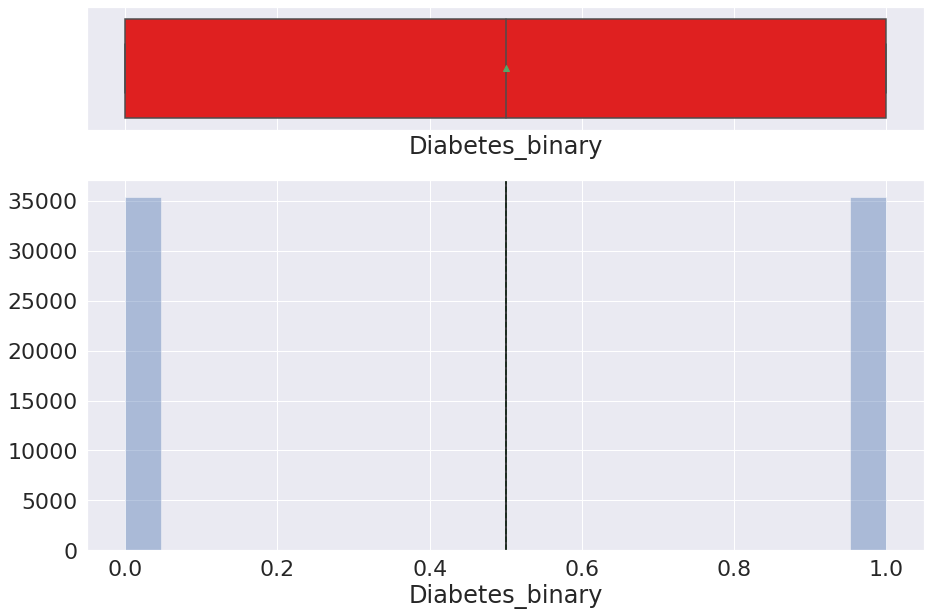

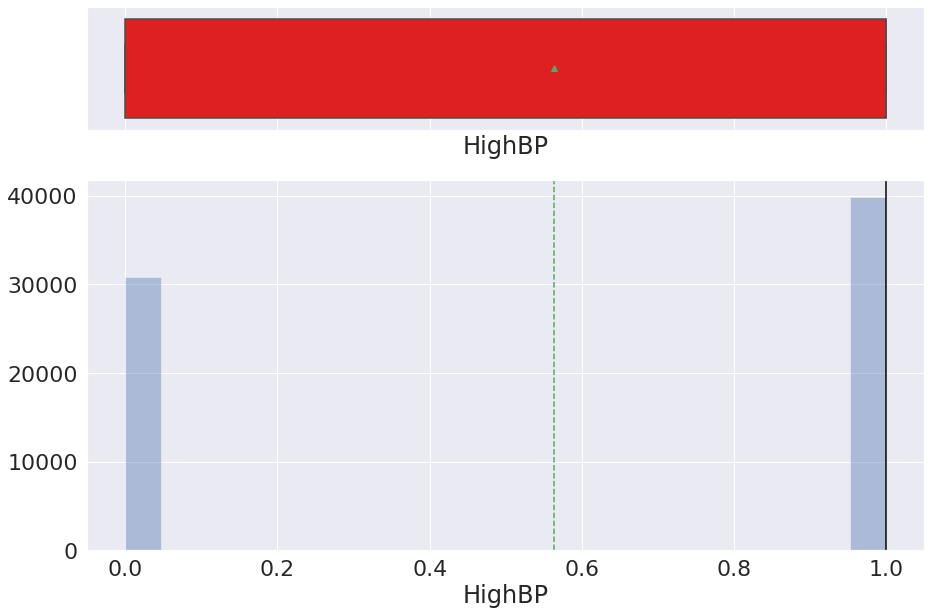

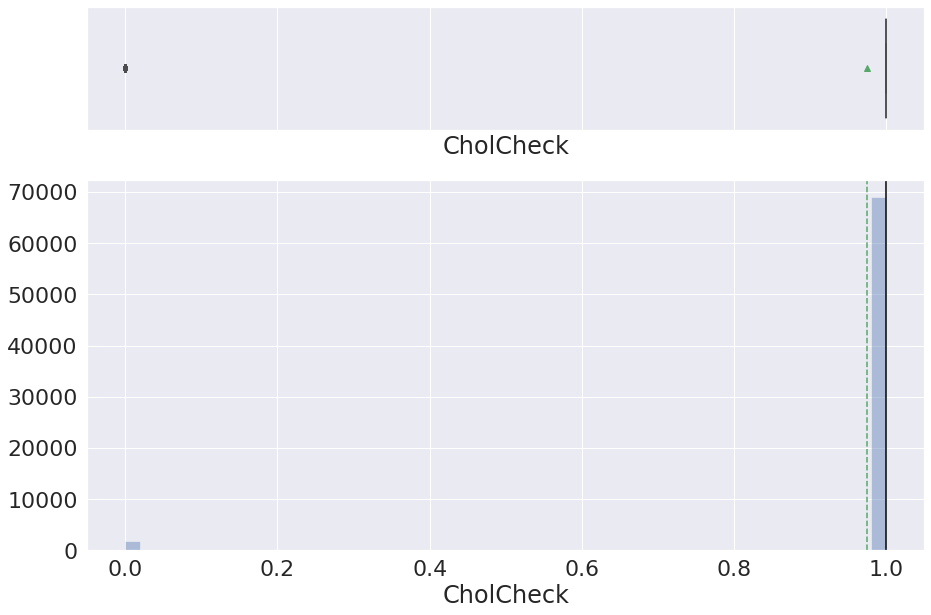

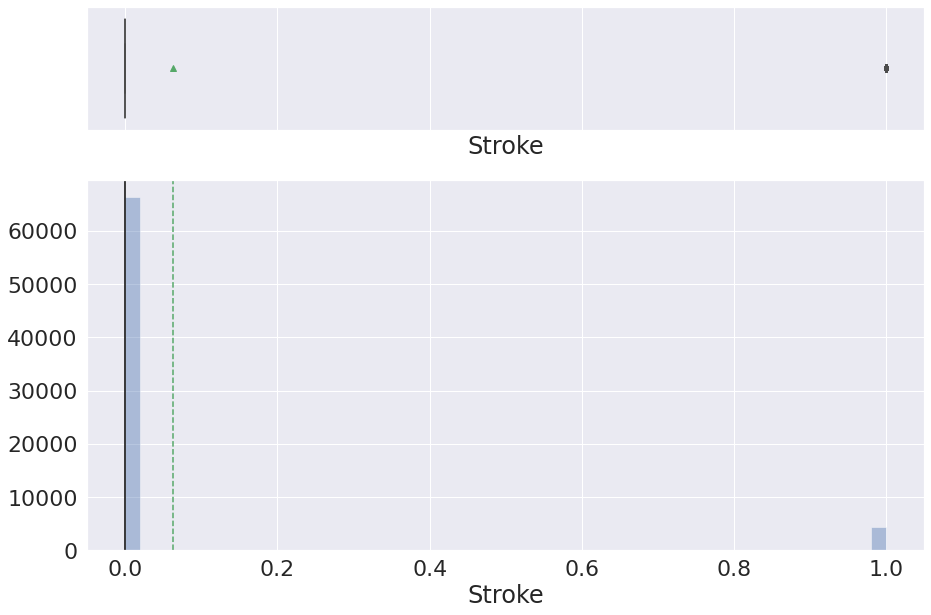

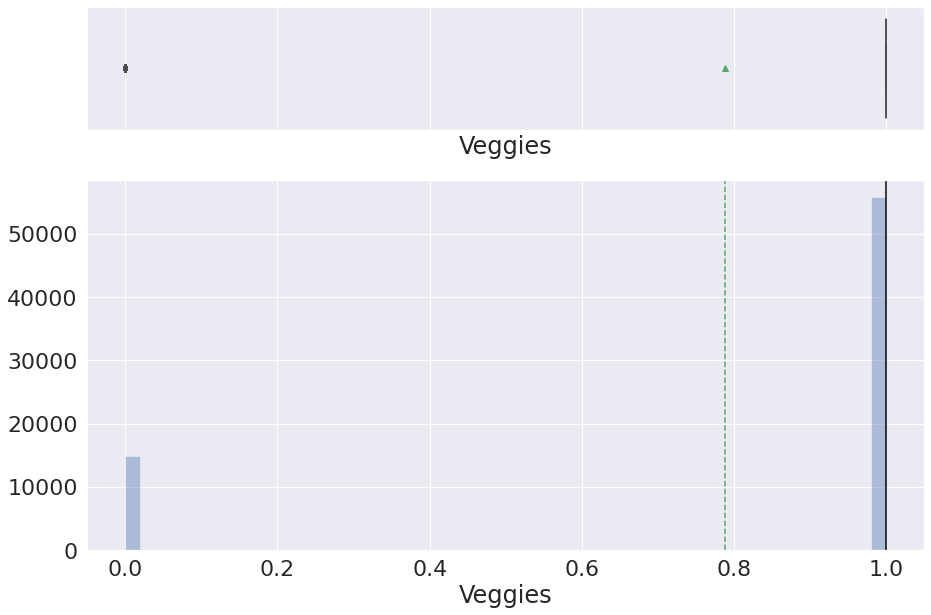

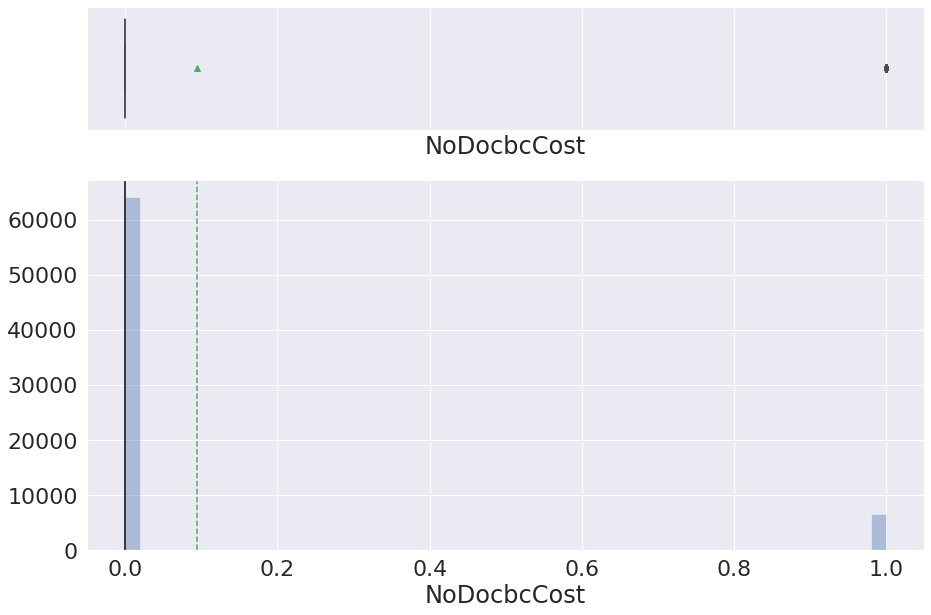

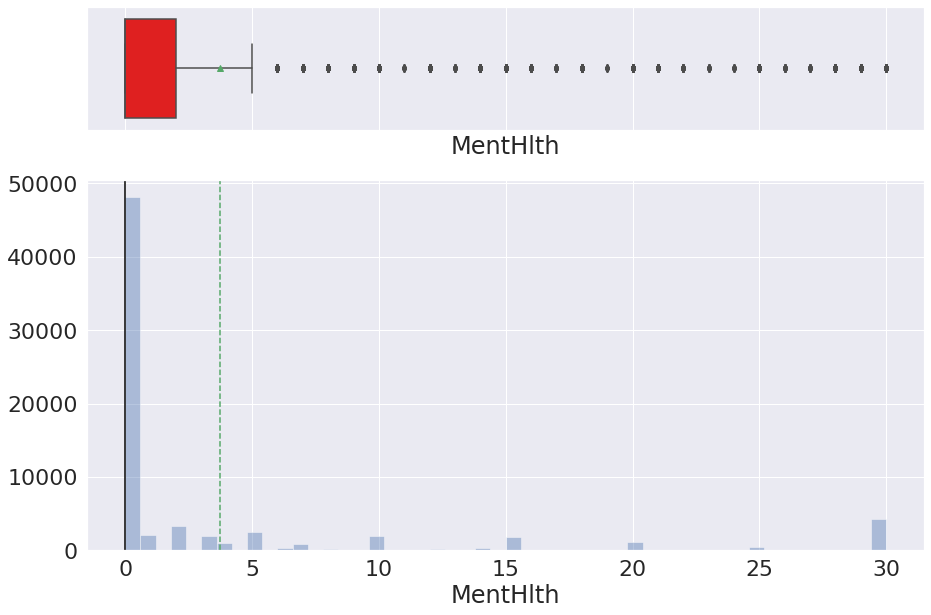

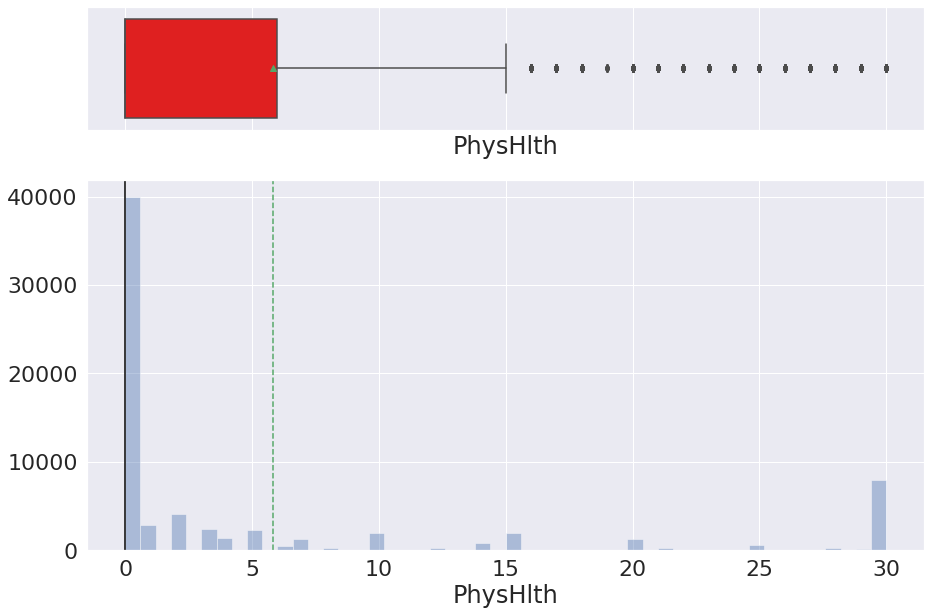

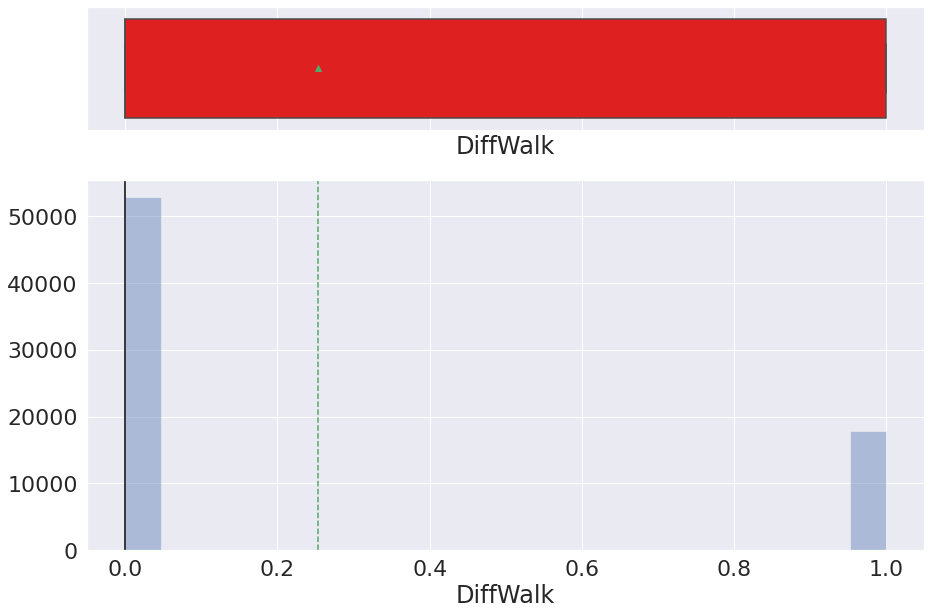

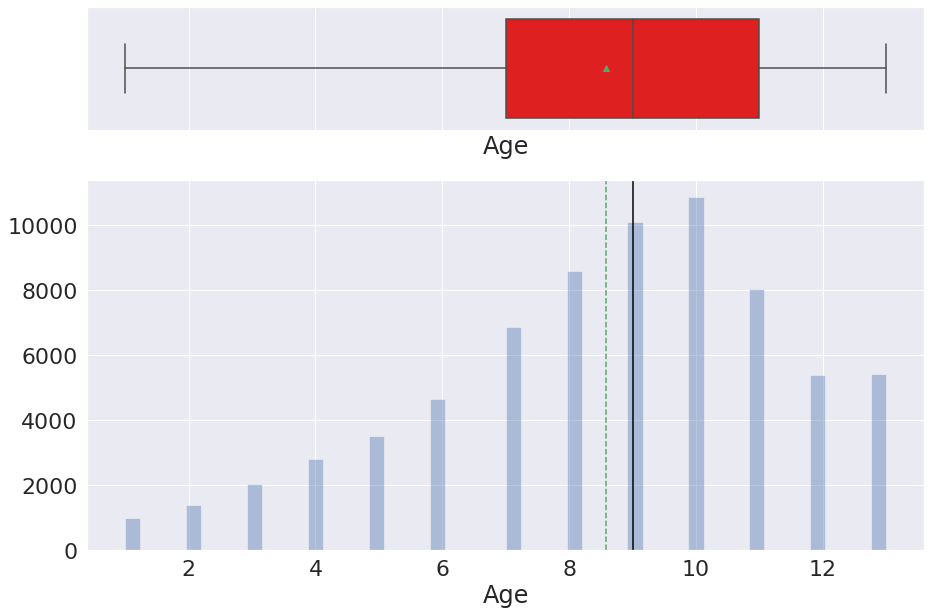

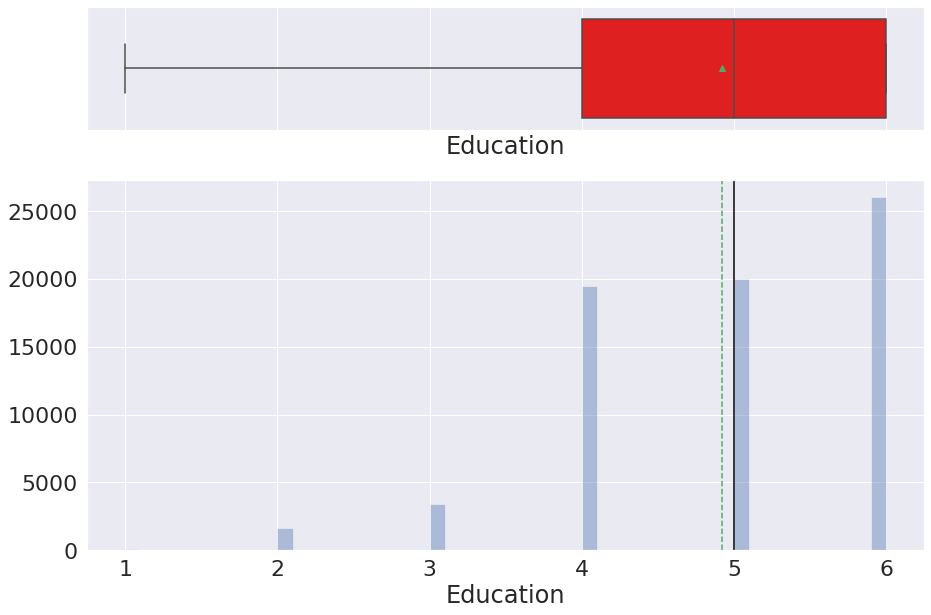

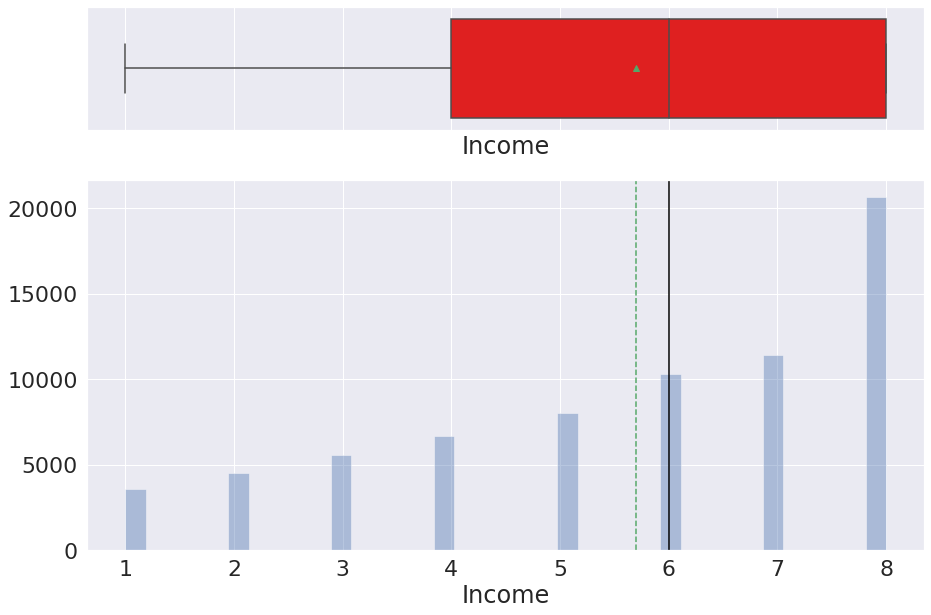

In [ ]:
#plotting histogram boxplot of every numeric columns in one for loop 
for feature in numeric_cols:
  histogram_boxplot(df[feature],figsize=(15,10),bins=None)
  plt.show()

##Checking Outliers:

In [ ]:
# Removing dependent variable to check outliers..
numeric_cols.remove("Diabetes_binary")

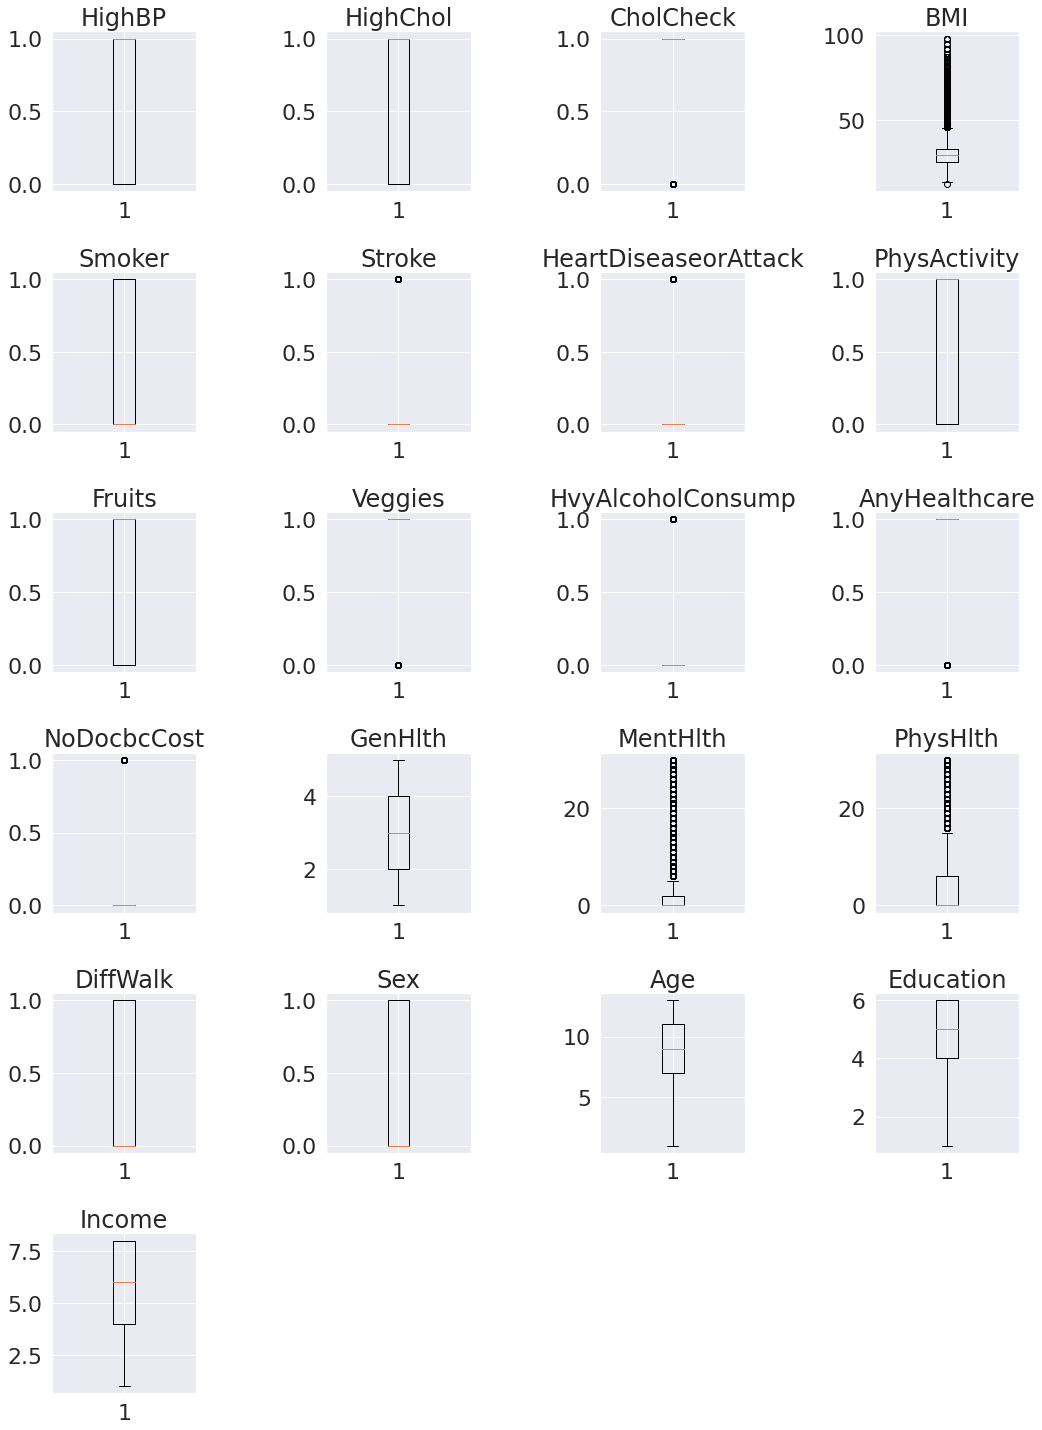

In [ ]:
#Outliers Detection Using Box Plot
# to plot the box plot of all the columns to find the outhliers
plt.figure(figsize=(15,30))
for i , variable in enumerate(numeric_cols):
                      plt.subplot(9,4,i+1)
                      plt.boxplot(df[variable],whis=1.5)
                      plt.tight_layout()
                      plt.title(variable)
plt.show()

**Observations:**
Not many columns have outliers expect 3-4 columns,we will treat those outliers.

In [ ]:
#outliers treatment 
#clipping method is used for outliers treatment 
#In the given code below first it gets q1,q3 and IQR of every column and clipping process is done for outliers treatment
#for outliers treatment we can use np.clip and np.where for cliiping purpose 
for feature in numeric_cols :
  Q1=df[feature].quantile(0.25)
  Q3=df[feature].quantile(0.75)
  IQR=Q3-Q1
  Upper_whisker=Q3+1.5*IQR
  Lower_whisker=Q1-1.5*IQR
  df[feature] = np.where(df[feature] <Lower_whisker,Lower_whisker ,df[feature])
  df[feature] = np.where(df[feature] >Upper_whisker, Upper_whisker,df[feature])

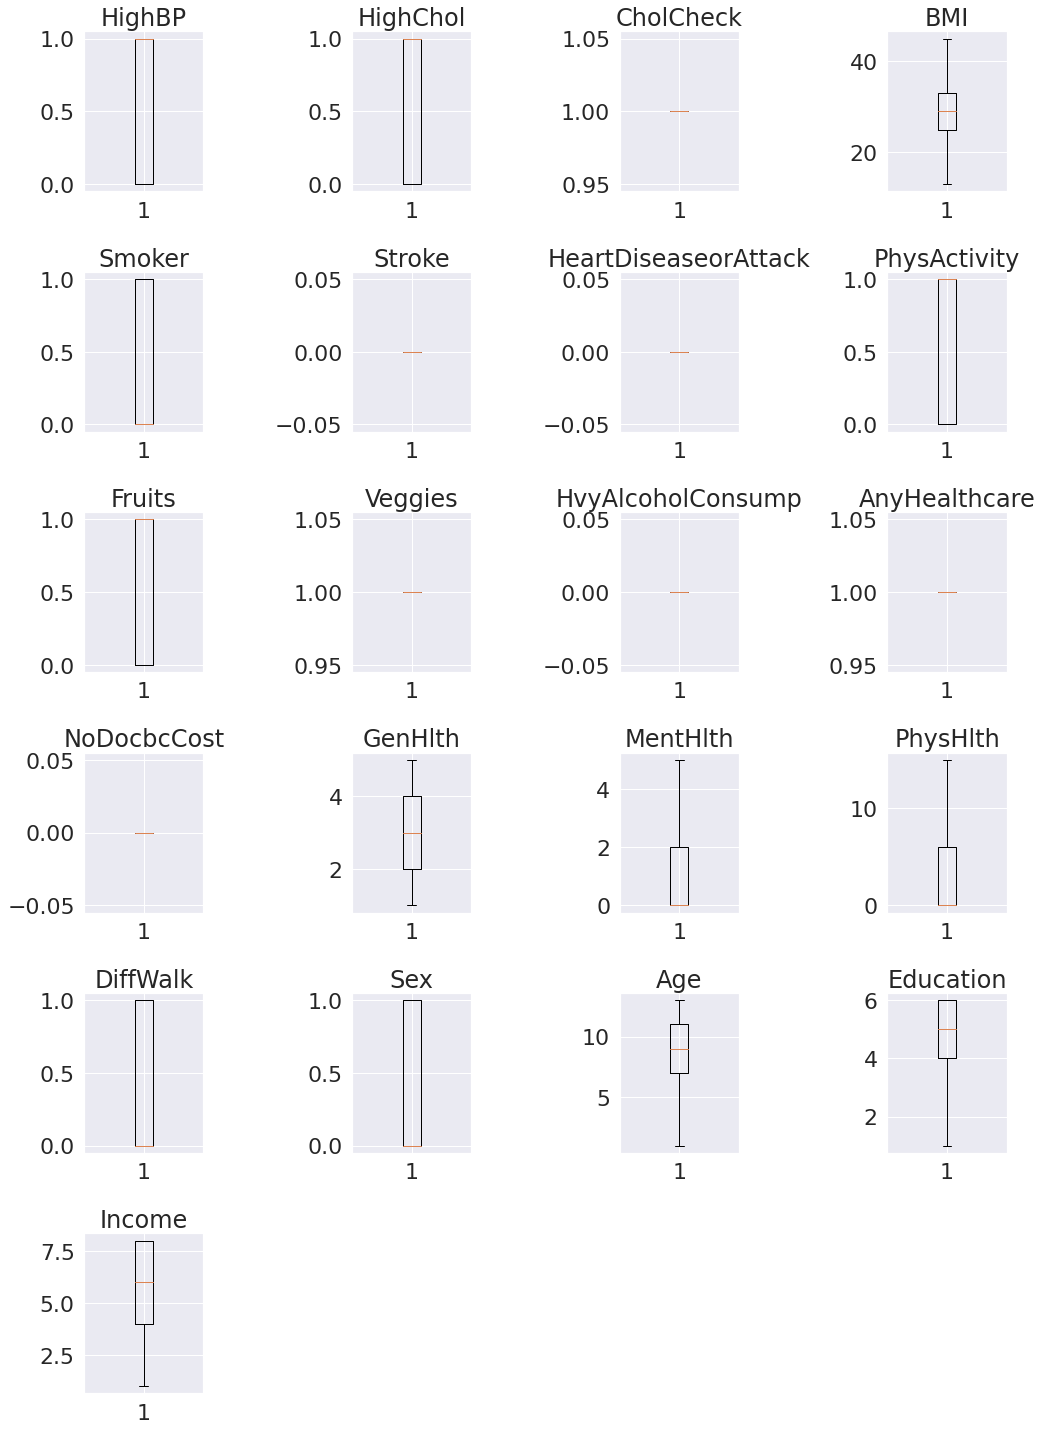

In [ ]:
#verify
plt.figure(figsize=(15,30))
for i , variable in enumerate(numeric_cols):
                      plt.subplot(9,4,i+1)
                      plt.boxplot(df[variable],whis=1.5)
                      plt.tight_layout()
                      plt.title(variable)
plt.show()

##Splitting the data into dependent and independent variables:

In [ ]:
#split the dependent and independent variable 
x = df.drop(['Diabetes_binary'], axis=1)
y = df[['Diabetes_binary']]

print(x.head())
print(y.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       0.0        1.0  26.0     0.0     0.0                   0.0   
1     1.0       1.0        1.0  26.0     1.0     0.0                   0.0   
2     0.0       0.0        1.0  26.0     0.0     0.0                   0.0   
3     1.0       1.0        1.0  28.0     1.0     0.0                   0.0   
4     0.0       0.0        1.0  29.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           1.0     0.0      1.0  ...            1.0          0.0      3.0   
1           0.0     1.0      1.0  ...            1.0          0.0      3.0   
2           1.0     1.0      1.0  ...            1.0          0.0      1.0   
3           1.0     1.0      1.0  ...            1.0          0.0      3.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income 

**Observations:**
since every column is label encoded there is no need for dummy variables.

##Model Building:

**Model building using Logistic Regression:**

In [ ]:
#split the dependent and independent variable 
x = df.drop(['Diabetes_binary'], axis=1)
y = df[['Diabetes_binary']]

print(x.head())
print(y.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       0.0        1.0  26.0     0.0     0.0                   0.0   
1     1.0       1.0        1.0  26.0     1.0     0.0                   0.0   
2     0.0       0.0        1.0  26.0     0.0     0.0                   0.0   
3     1.0       1.0        1.0  28.0     1.0     0.0                   0.0   
4     0.0       0.0        1.0  29.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           1.0     0.0      1.0  ...            1.0          0.0      3.0   
1           0.0     1.0      1.0  ...            1.0          0.0      3.0   
2           1.0     1.0      1.0  ...            1.0          0.0      1.0   
3           1.0     1.0      1.0  ...            1.0          0.0      3.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income 

In [ ]:
#import required libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

In [ ]:
#checking the shape of splited data
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(53019, 21) (17673, 21) (53019, 1) (17673, 1)


In [ ]:
#import confusion matrix code 
#cnfusion matrix creates crosstab of TN,TP,FP,FN
from sklearn.metrics import confusion_matrix

In [ ]:
# defining a confusion matrix

def make_confusion_matrix(y_actual,y_predict,labels=[1,0]):
  '''
  y_predict : prediction of class
  y_actual : ground truth 
  '''
  cm =confusion_matrix(y_actual,y_predict,labels=[1,0])
  df_cm = pd.DataFrame(cm,index=[i for i in ["Provide Disc","No Disc"]],
                       columns=[i for i in ["Provide Disc","No Disc"]])
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1,v2 in
            zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm,annot=labels,fmt='')
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

In [ ]:
#choose the model and analyze
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=69)

In [ ]:
#fitting the model from x,y train set
logreg.fit(x_train, y_train)

LogisticRegression(random_state=69)

In [ ]:
#predict the test set
pred_test = logreg.predict(x_test)

In [ ]:
#predict the train set
pred_train = logreg.predict(x_train)

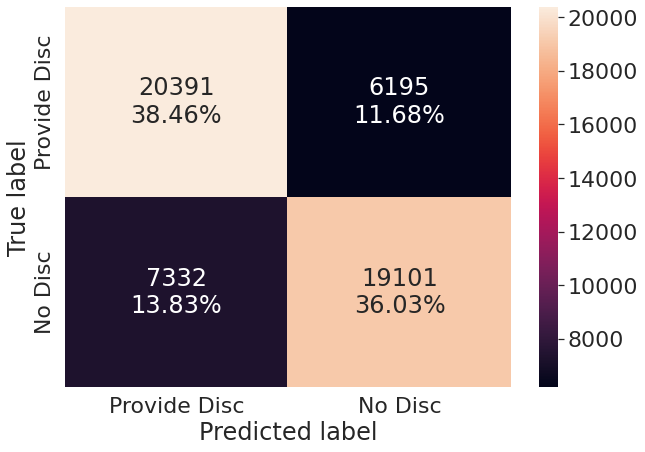

In [ ]:
#calling the confusion matrix for train data 
make_confusion_matrix(y_train,pred_train)

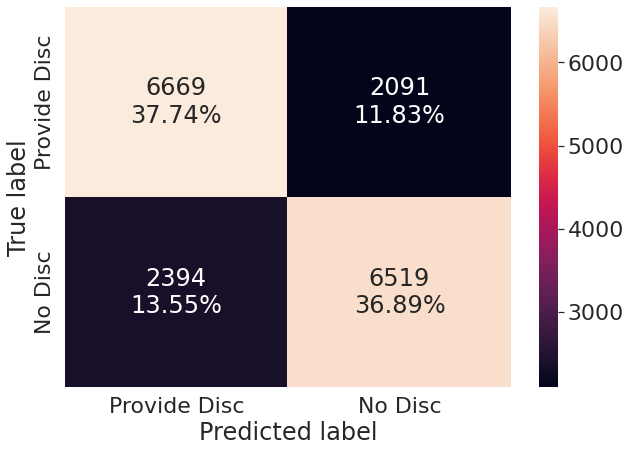

In [ ]:
#for test data call confusion matrix
make_confusion_matrix(y_test,pred_test)

In [ ]:
#import required finding values
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
#evaluating the model using various scores..
print("Accuracy on train data:",accuracy_score(y_train,pred_train))
print("Accuracy on test data:",accuracy_score(y_test,pred_test))
print("\n")
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")
print("Precision on train data:",precision_score(y_train,pred_train))
print("Precision on test data:",precision_score(y_test,pred_test))
print("\n")
print("f1 on train data:",f1_score(y_train,pred_train))
print("f1 on test data:",f1_score(y_test,pred_test))
print("\n")

Accuracy on train data: 0.744865048378883
Accuracy on test data: 0.7462230521133933


Recall on train data: 0.7669826224328594
Recall on test data: 0.7613013698630137


Precision on train data: 0.7355264581755221
Precision on test data: 0.7358490566037735


f1 on train data: 0.7509252610064628
f1 on test data: 0.74835886214442




In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

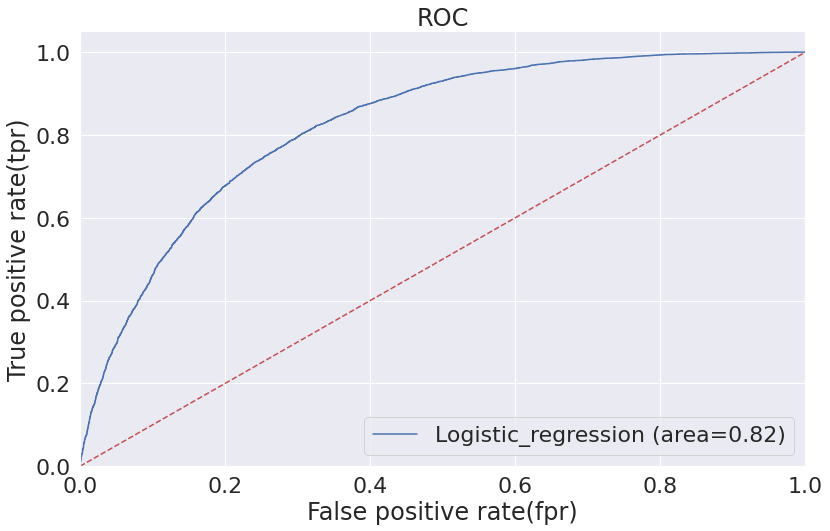

In [ ]:
#plotting the roc curve and getting the value of auc 
logit_roc_auc=roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label="Logistic_regression (area=%0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate(fpr)")
plt.ylabel("True positive rate(tpr)")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [ ]:
#probaility of train set for predicted value
train_pred_prob = logreg.predict_proba(x_train)[:,1]
train_pred_prob

array([0.17540563, 0.25675983, 0.76913742, ..., 0.03257234, 0.66986914,
       0.30983547])

In [ ]:
#getting the value of cutoff,TN,TP,FN,FP,P,N
columns_names =["Cutoff_prob","TP","FN","TN","FP","P","N"]

cutoff_data= pd.DataFrame(columns=columns_names)
Cutoff_prob=np.arange(0,1.01,0.01)

for cutoff in Cutoff_prob:
  y_train["pred_y"]=(train_pred_prob > cutoff).astype("int64")
  TP =np.logical_and((y_train.pred_y ==1),(y_train.Diabetes_binary ==1)).sum()
  FN =np.logical_and((y_train.pred_y ==0),(y_train.Diabetes_binary ==1)).sum()
  TN =np.logical_and((y_train.pred_y ==0),(y_train.Diabetes_binary ==0)).sum()
  FP =np.logical_and((y_train.pred_y ==1),(y_train.Diabetes_binary ==0)).sum()
  P =TP + FN
  N =TN + FP
  temp_data={"Cutoff_Prob":cutoff,
             "TP":TP,
             "FN":FN,
             "TN":TN,
             "FP":FP,
             "P":P,
             "N":N}

  cutoff_data =cutoff_data.append(temp_data,ignore_index=True)   

  y_train.drop("pred_y",axis =1 ,inplace=True)

In [ ]:
#values of sn,sp,ks,dist cutoffs,re,pr,f1,tpr,fpr
cutoff_data['Sn'] =cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] =cutoff_data["TN"]/cutoff_data["N"]
cutoff_data["Dist"]=((1-cutoff_data["Sn"])*2 + (1-cutoff_data["Sp"])*2) **0.5
cutoff_data["KS"]=((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] =cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] =cutoff_data["TP"]/(cutoff_data["TP"]+cutoff_data["FP"])
cutoff_data['tpr'] =cutoff_data["Re"]
cutoff_data['fpr'] =1 - cutoff_data["Sp"]
cutoff_data["f1"]=2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] +cutoff_data["Re"])

In [ ]:
#selecting the required cutoff values for separating the 1's and 0's
dist_cutoffs = cutoff_data["Dist"].min()
ks_cutoffs = cutoff_data["KS"].max()
f1_cutoffs = cutoff_data["f1"].max()

In [ ]:
#verify the values
cutoff_data.head()

Cutoff_prob       TP    FN      TN       FP        P        N  Cutoff_Prob  \
0          NaN  26586.0   0.0     0.0  26433.0  26586.0  26433.0         0.00   
1          NaN  26586.0   0.0     1.0  26432.0  26586.0  26433.0         0.01   
2          NaN  26585.0   1.0    98.0  26335.0  26586.0  26433.0         0.02   
3          NaN  26581.0   5.0   463.0  25970.0  26586.0  26433.0         0.03   
4          NaN  26574.0  12.0  1046.0  25387.0  26586.0  26433.0         0.04   

         Sn        Sp      Dist        KS        Re        Pr       tpr  \
0  1.000000  0.000000  1.414214  0.000000  1.000000  0.501443  1.000000   
1  1.000000  0.000038  1.414187  0.000038  1.000000  0.501452  1.000000   
2  0.999962  0.003707  1.411616  0.003670  0.999962  0.502362  0.999962   
3  0.999812  0.017516  1.401907  0.017328  0.999812  0.505813  0.999812   
4  0.999549  0.039572  1.386275  0.039120  0.999549  0.511422  0.999549   

        fpr        f1  
0  1.000000  0.667948  
1  0.999962  0.667956  
2  0.996293  0.668755  
3  0.982484  0.671772  
4  0.960428  0.676639

In [ ]:
#getting the values of accuracy,recall,precision,f1 scores from the cutoff values.
cutoffs = [dist_cutoffs,ks_cutoffs,f1_cutoffs]
for cutoff in cutoffs:
  y_pred_train = (logreg.predict_proba(x_train)[:,1]> cutoff).astype(int)
  y_pred_test = (logreg.predict_proba(x_test)[:,1]> cutoff).astype(int)
  print("using the cutoff value as : ",cutoff)
  print("Accuracy on train data :", accuracy_score(y_train,y_pred_train))
  print("Accuracy on test data :",accuracy_score(y_test,y_pred_test))
  print("Recall on train data:", recall_score(y_train, y_pred_train))
  print("Recall on test data:", recall_score(y_test, y_pred_test))
  print("Precision on train data:", precision_score(y_train, y_pred_train))
  print("Precision on test data:", precision_score(y_test, y_pred_test))
  print("f1 score on train data :",f1_score(y_train,y_pred_train))
  print("f1 score on test data :",f1_score(y_test,y_pred_test))
  print("\n")

using the cutoff value as :  1.0062007272086242
Accuracy on train data : 0.49855712103208283
Accuracy on test data : 0.5043286369037515
Recall on train data: 0.0
Recall on test data: 0.0
Precision on train data: 0.0
Precision on test data: 0.0
f1 score on train data : 0.0
f1 score on test data : 0.0


using the cutoff value as :  0.4937800482824179
Accuracy on train data : 0.7455817725720968
Accuracy on test data : 0.7470718044474622
Recall on train data: 0.7731512826299556
Recall on test data: 0.7690639269406393
Precision on train data: 0.7337664655695569
Precision on test data: 0.733558362369338
f1 score on train data : 0.75294419311709
f1 score on test data : 0.7508916629514043


using the cutoff value as :  0.7718595908802423
Accuracy on train data : 0.647843226013316
Accuracy on test data : 0.6496916199852882
Recall on train data: 0.37090950124125477
Recall on test data: 0.3622146118721461
Precision on train data: 0.8351825188447531
Precision on test data: 0.8400847233253905
f1 sc

In [ ]:
#creating dataframe of predicted values
sample_df = pd.DataFrame({'HighBP' : x_test['HighBP'],'Diabetes_binary':predictions_test})
sample_df

HighBP  Diabetes_binary
25002     1.0              0.0
45944     1.0              1.0
23894     1.0              0.0
6931      0.0              0.0
39255     0.0              1.0
...       ...              ...
43033     0.0              0.0
30157     1.0              1.0
13101     1.0              1.0
47311     1.0              1.0
16611     1.0              1.0

[17673 rows x 2 columns]

In [ ]:
#converting the file into csv to understand properly using HighBP column..
sample_df=sample_df.to_csv('sample.csv')

**Model building using Decision Tree Classifier Algorithm:**

In [ ]:
#split the dependent and independent variable 
x = df.drop(['Diabetes_binary','HvyAlcoholConsump','CholCheck','NoDocbcCost','HeartDiseaseorAttack','Stroke','Veggies','AnyHealthcare'], axis=1)
y = df[['Diabetes_binary']]

print(x.head())
print(y.head())

   HighBP  HighChol   BMI  Smoker  PhysActivity  Fruits  GenHlth  MentHlth  \
0     1.0       0.0  26.0     0.0           1.0     0.0      3.0       5.0   
1     1.0       1.0  26.0     1.0           0.0     1.0      3.0       0.0   
2     0.0       0.0  26.0     0.0           1.0     1.0      1.0       0.0   
3     1.0       1.0  28.0     1.0           1.0     1.0      3.0       0.0   
4     0.0       0.0  29.0     1.0           1.0     1.0      2.0       0.0   

   PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      15.0       0.0  1.0   4.0        6.0     8.0  
1       0.0       0.0  1.0  12.0        6.0     8.0  
2      10.0       0.0  1.0  13.0        6.0     8.0  
3       3.0       0.0  1.0  11.0        6.0     8.0  
4       0.0       0.0  0.0   8.0        5.0     8.0  
   Diabetes_binary
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#import required libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 7)

In [ ]:
model=DecisionTreeClassifier(criterion='gini',random_state=7)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=7)

In [ ]:
#predict the test set
pred_test = model.predict(x_test)

In [ ]:
#predict trian set
pred_train=model.predict(x_train)

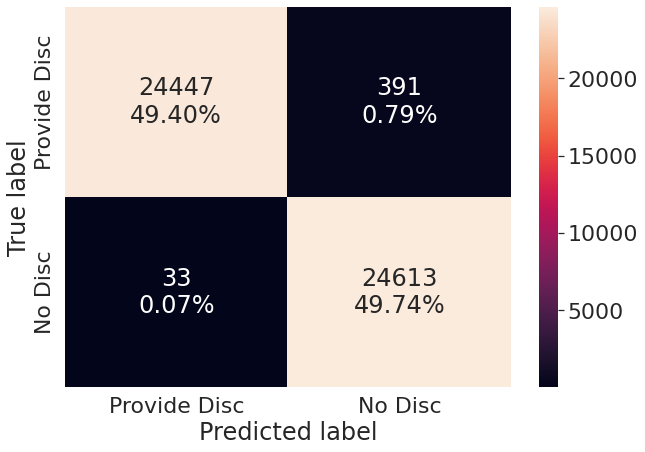

In [ ]:
#calling the confusion matrix for train data 
make_confusion_matrix(y_train,pred_train)

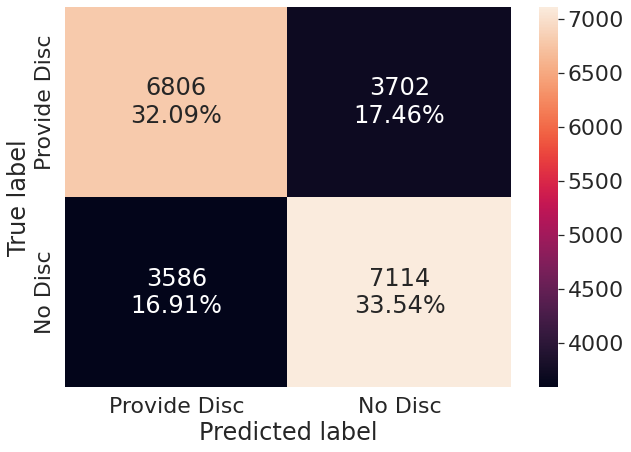

In [ ]:
#calling the confusion matrix for test data 
make_confusion_matrix(y_test,pred_test)

In [ ]:
#evaluating the model using recall score
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")

Recall on train data: 0.9842579917867783
Recall on test data: 0.6476969927674153




In [ ]:
#evaluating the model using precision score
print("Precision on train data:",precision_score(y_train,pred_train))
print("Precision on test data:",precision_score(y_test,pred_test))
print("\n")

Precision on train data: 0.9986519607843137
Precision on test data: 0.6549268668206313




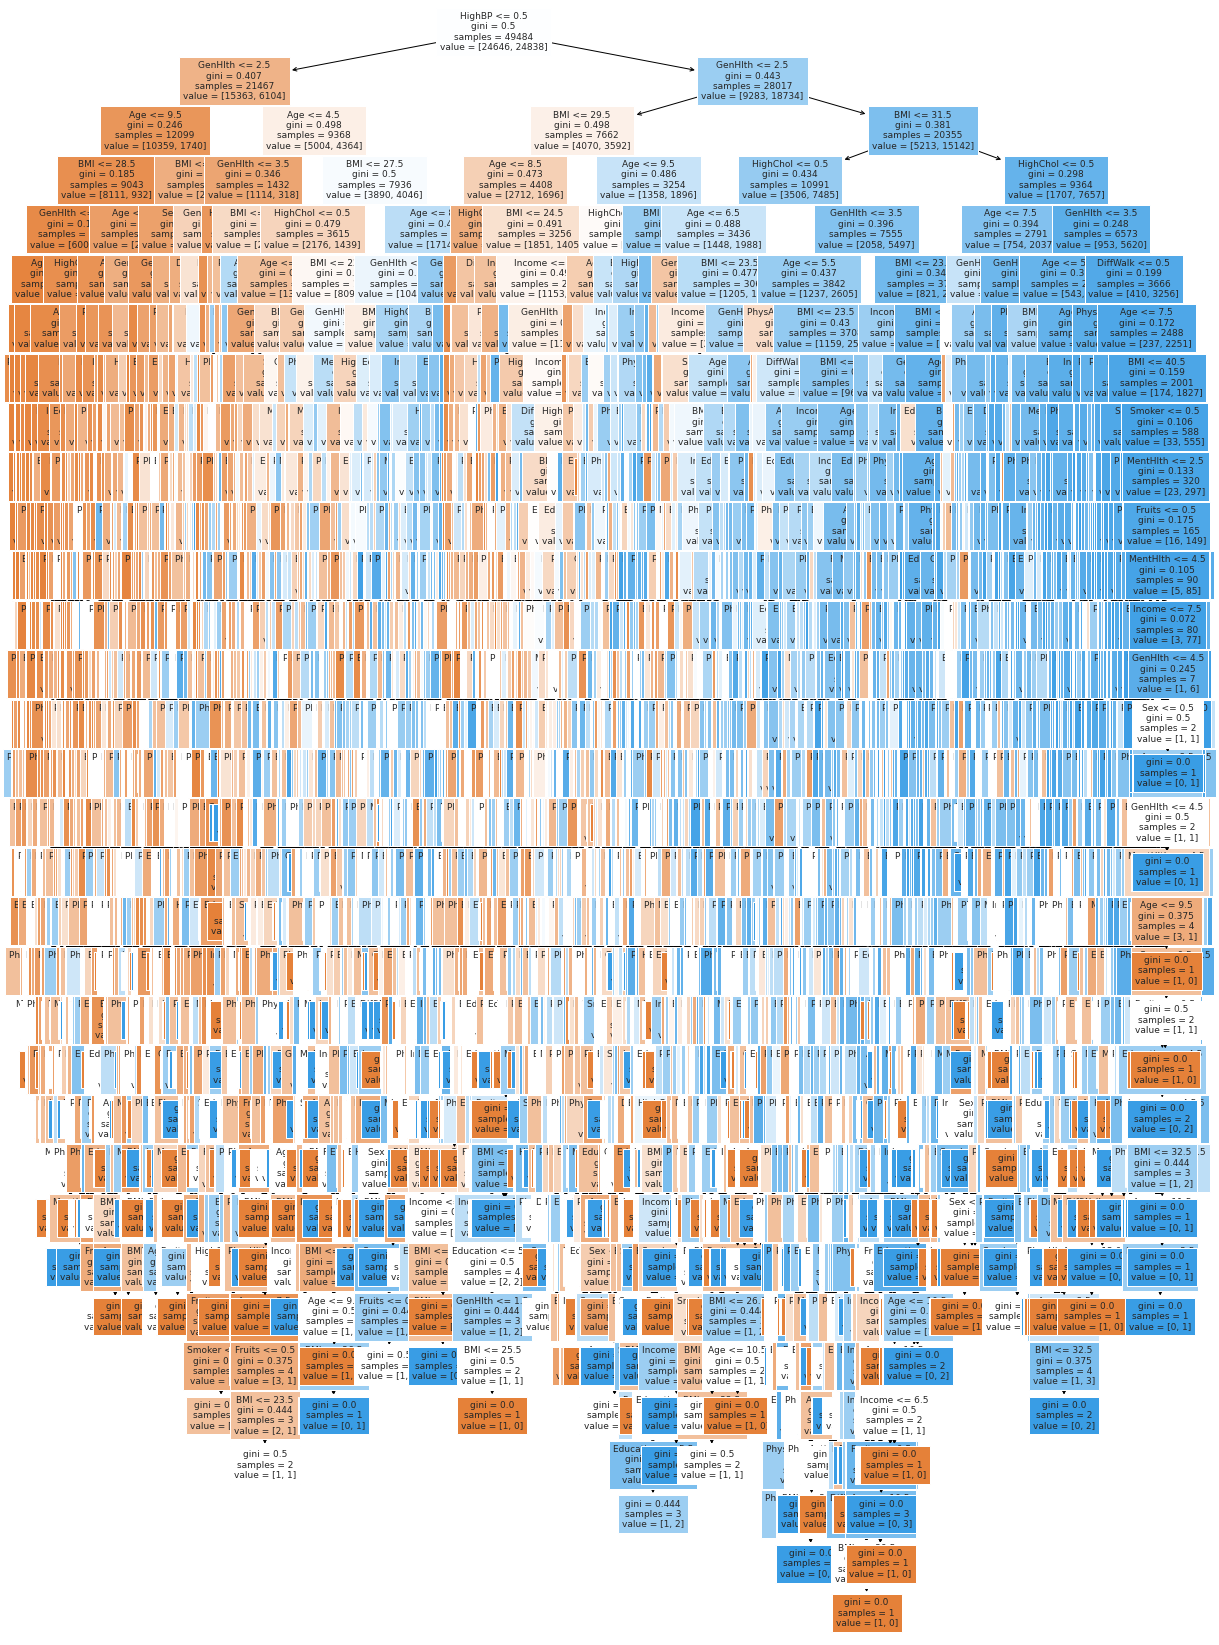

In [ ]:
#building the tree using all the columns.
from sklearn import tree
feature_names=list(x.columns)
plt.figure(figsize=(20,30))
out =tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)

for o in out:
  arrow =o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [ ]:
#importance of features
print(pd.DataFrame(model.feature_importances_,columns=["Imp"],index=x_train.columns).sort_values(by = "Imp",ascending=False))

                   Imp
HighBP        0.147874
BMI           0.143762
Age           0.116100
GenHlth       0.103129
Income        0.099565
Education     0.076828
PhysHlth      0.075841
MentHlth      0.046560
Smoker        0.040298
Fruits        0.038901
Sex           0.034263
PhysActivity  0.033817
HighChol      0.021632
DiffWalk      0.021431


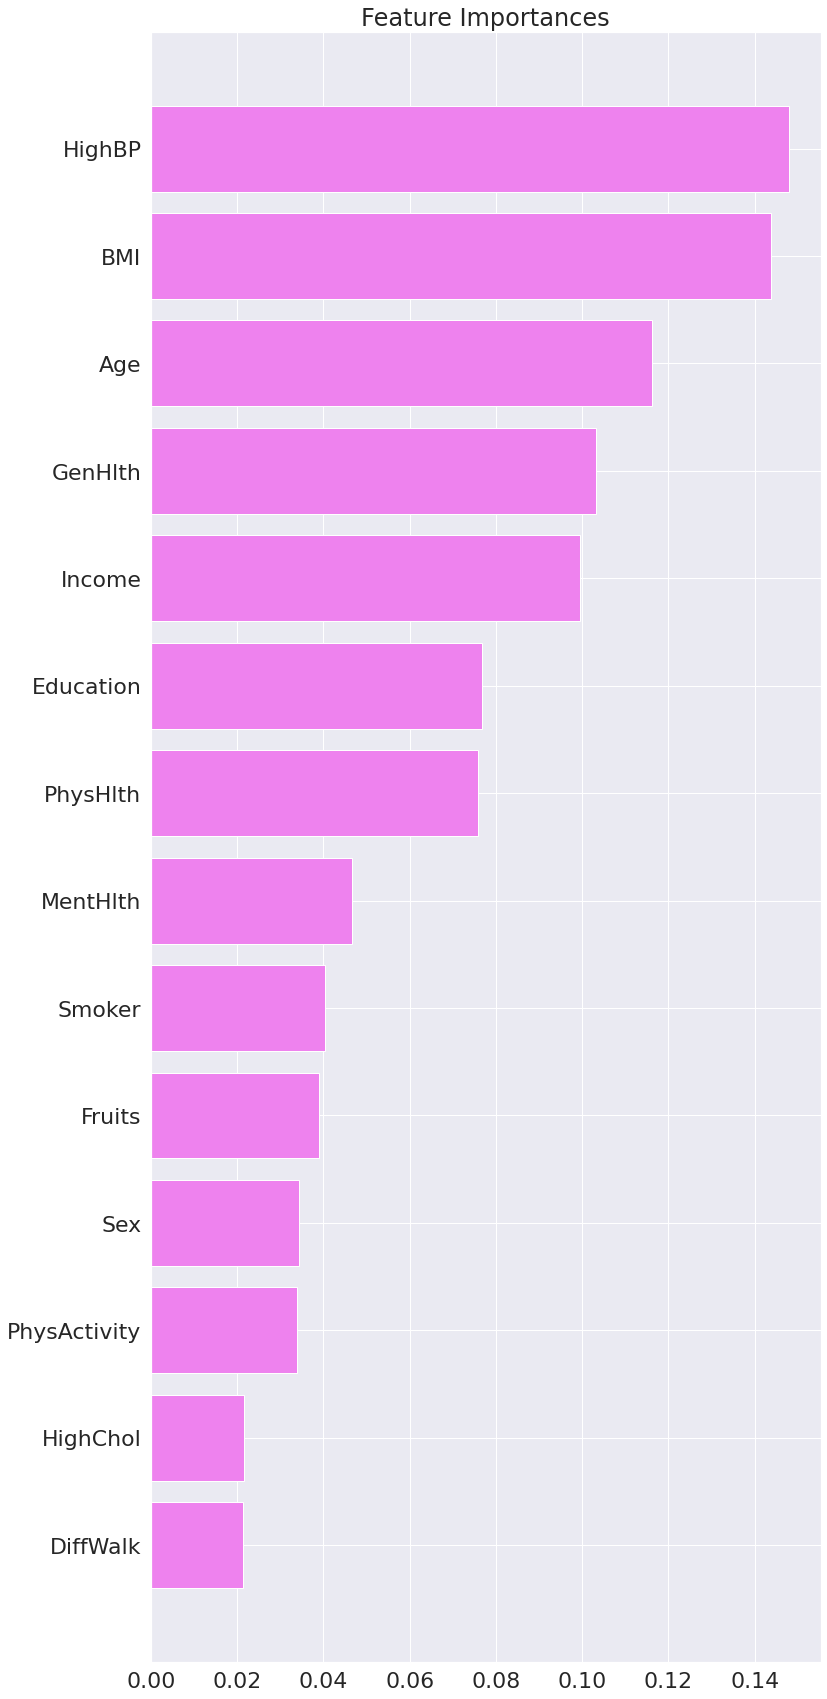

In [ ]:
#plotting feature importance of model.
importances=model.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(12,30))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color="violet",align="center")
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.show()

In [ ]:
#hyperparameter tunning for decision tree algorithm using various parameters.
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
estimator = DecisionTreeClassifier(random_state=7)
parameters={
          'max_depth':np.arange(4,7),
           'criterion':['gini'],
           'splitter':['best'],
           'min_impurity_decrease':[0.00001,0.0001],
           'max_features':['log2'],
            'min_samples_split':[60],
          
          }

scorer =metrics.make_scorer(metrics.recall_score)

grid_obj =RandomizedSearchCV(estimator,parameters,n_jobs=-1,n_iter=50,scoring=scorer,cv=5)
grid_obj=grid_obj.fit(x_train,y_train)

estimator =grid_obj.best_estimator_

estimator.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='log2',
                       min_impurity_decrease=0.0001, min_samples_split=60,
                       random_state=7)

In [ ]:
#Predicting for train data
pred_train_estimator=estimator.predict(x_train)

In [ ]:
#predicting for test data
pred_test_estimator=estimator.predict(x_test)

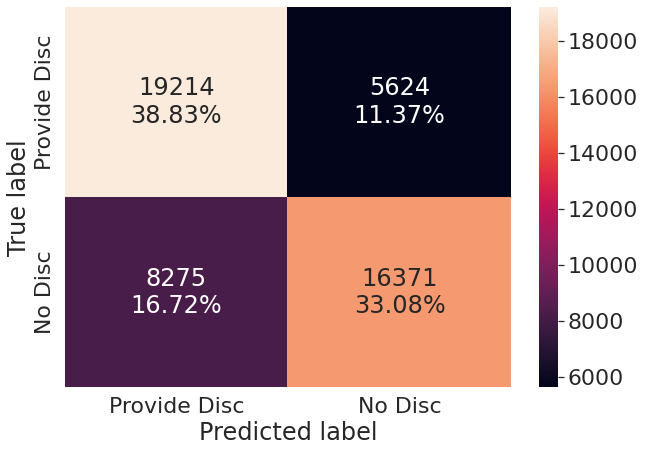

In [ ]:
#calling the confusion matrix for train data 
make_confusion_matrix(y_train,pred_train_estimator)

In [ ]:
#calling the confusion matrix for train data 
make_confusion_matrix(y_test,pred_test_estimator)

In [ ]:
#evaluating the model using recall score.
print("Recall on train data:",recall_score(y_train,pred_train_estimator))
print("Recall on test data:",recall_score(y_test,pred_test_estimator))
print("\n")

Recall on train data: 0.7735727514292616
Recall on test data: 0.7763608679101637




In [ ]:
#evaluating the model using precision score.
print("Precision on train data:",precision_score(y_train,pred_train_estimator))
print("Precision on test data:",precision_score(y_test,pred_test_estimator))
print("\n")

Precision on train data: 0.698970497289825
Precision on test data: 0.6970266575529733




**Model Building using Random Forest Algorithm:**

In [ ]:
#split the dependent and independent variable 
x = df.drop(['Diabetes_binary','HvyAlcoholConsump','CholCheck','NoDocbcCost','HeartDiseaseorAttack','Stroke','Veggies','AnyHealthcare'], axis=1)
y = df[['Diabetes_binary']]

print(x.head())
print(y.head())

   HighBP  HighChol   BMI  Smoker  PhysActivity  Fruits  GenHlth  MentHlth  \
0     1.0       0.0  26.0     0.0           1.0     0.0      3.0       5.0   
1     1.0       1.0  26.0     1.0           0.0     1.0      3.0       0.0   
2     0.0       0.0  26.0     0.0           1.0     1.0      1.0       0.0   
3     1.0       1.0  28.0     1.0           1.0     1.0      3.0       0.0   
4     0.0       0.0  29.0     1.0           1.0     1.0      2.0       0.0   

   PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      15.0       0.0  1.0   4.0        6.0     8.0  
1       0.0       0.0  1.0  12.0        6.0     8.0  
2      10.0       0.0  1.0  13.0        6.0     8.0  
3       3.0       0.0  1.0  11.0        6.0     8.0  
4       0.0       0.0  0.0   8.0        5.0     8.0  
   Diabetes_binary
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from pandas.core.common import random_state
rf=RandomForestClassifier(random_state=7)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=7)

In [ ]:
pred_train1=rf.predict(x_train)

In [ ]:
pred_test1=rf.predict(x_test)

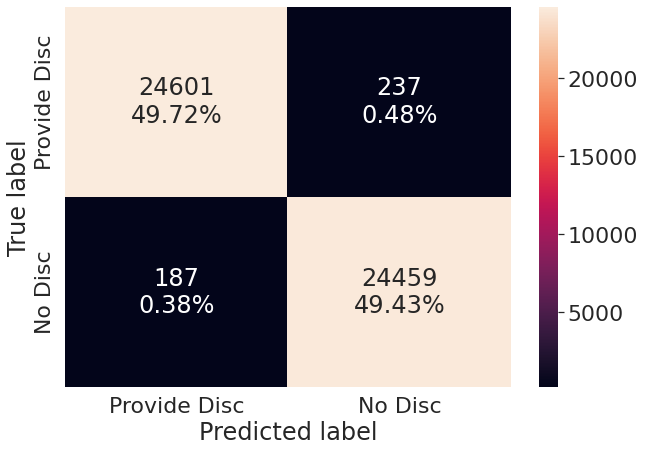

In [ ]:
make_confusion_matrix(y_train,pred_train1)

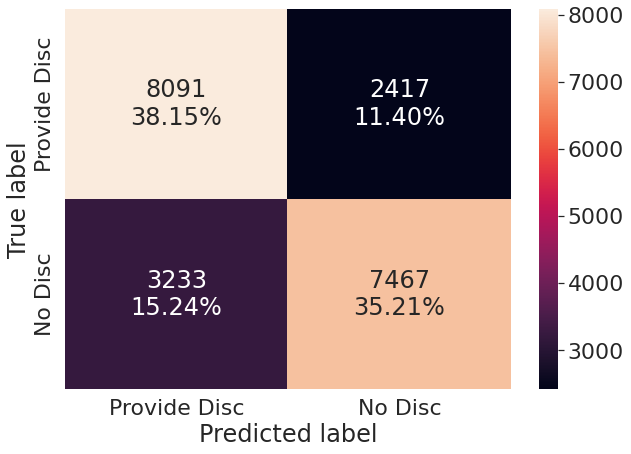

In [ ]:
make_confusion_matrix(y_test,pred_test1)

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train1))
print("Recall on test data:",recall_score(y_test,pred_test1))
print("\n")

Recall on train data: 0.9904581689346968
Recall on test data: 0.7699847735059002




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train1))
print("precision on test data:",precision_score(y_test,pred_test1))
print("\n")

precision on train data: 0.9924560271098919
precision on test data: 0.7145001766160367




In [ ]:
rf_estimator=RandomForestClassifier(random_state=7)
parameters={
          'n_estimators':[69],
           'min_samples_leaf':np.arange(1,6,1),
           'max_features':['auto','sqrt', 'log2'],
           'max_samples':[0.7,0.8,0.9,None],
            'criterion':['gini']
          }
 

grid_obj =RandomizedSearchCV(rf_estimator,parameters,n_jobs=-1,n_iter=10,scoring='recall',cv=10)
grid_obj=grid_obj.fit(x_train,y_train)
rf_estimator=grid_obj.best_estimator_
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, min_samples_leaf=4,
                       n_estimators=69, random_state=7)

In [ ]:
pred_train3=rf_estimator.predict(x_train)

In [ ]:
pred_test3=rf_estimator.predict(x_test)

In [ ]:
make_confusion_matrix(y_train,pred_train3)

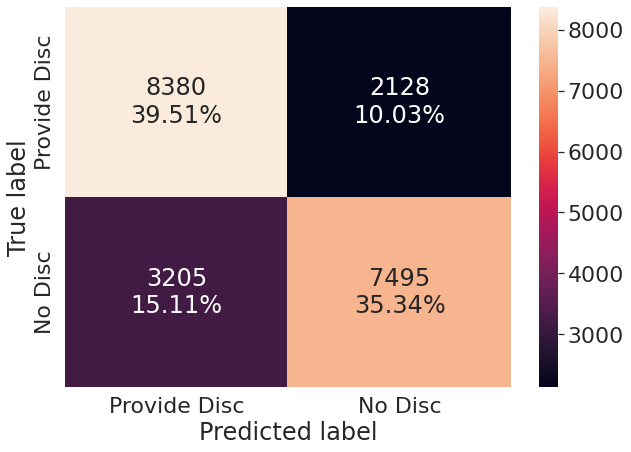

In [ ]:
make_confusion_matrix(y_test,pred_test3)

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train3))
print("Recall on test data:",recall_score(y_test,pred_test3))
print("\n")

Recall on train data: 0.8587245349867139
Recall on test data: 0.7974876284735439




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train3))
print("precision on test data:",precision_score(y_test,pred_test3))
print("\n")

precision on train data: 0.7918987153783322
precision on test data: 0.7233491583944757




**Model Building using XGBoost Algorithm:**

In [ ]:
#split the dependent and independent variable 
x = df.drop(['Diabetes_binary','HvyAlcoholConsump','CholCheck','NoDocbcCost','HeartDiseaseorAttack','Stroke','Veggies','AnyHealthcare'], axis=1)
y = df[['Diabetes_binary']]

print(x.head())
print(y.head())

   HighBP  HighChol   BMI  Smoker  PhysActivity  Fruits  GenHlth  MentHlth  \
0     1.0       0.0  26.0     0.0           1.0     0.0      3.0       5.0   
1     1.0       1.0  26.0     1.0           0.0     1.0      3.0       0.0   
2     0.0       0.0  26.0     0.0           1.0     1.0      1.0       0.0   
3     1.0       1.0  28.0     1.0           1.0     1.0      3.0       0.0   
4     0.0       0.0  29.0     1.0           1.0     1.0      2.0       0.0   

   PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      15.0       0.0  1.0   4.0        6.0     8.0  
1       0.0       0.0  1.0  12.0        6.0     8.0  
2      10.0       0.0  1.0  13.0        6.0     8.0  
3       3.0       0.0  1.0  11.0        6.0     8.0  
4       0.0       0.0  0.0   8.0        5.0     8.0  
   Diabetes_binary
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0


In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
xgb_classifier=XGBClassifier(random_state=7,eval_metric="logloss")
xgb_classifier.fit(x_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=7)

In [ ]:
pred_train=xgb_classifier.predict(x_train)
pred_test=xgb_classifier.predict(x_test)

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")

Recall on train data: 0.7995974291969772
Recall on test data: 0.8079112122936825




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train))
print("precision on test data:",precision_score(y_test,pred_test))
print("\n")

precision on train data: 0.7290787906108124
precision on test data: 0.7276688453159041




In [ ]:
xgb_tuned = XGBClassifier(random_state=7,eval_metric="logloss")

parameter ={
    "n_estimators":np.arange(150,250,50),
    "scale_pos_weight":[1,2],
    "subsample":[0.7,0.9,1],
    "learning_rate":np.arange(0.1,0.4,0.1),
    "gamma":[1,3,5],
    "colsample_bytree":[0.7,0.8,0.9],
    "colsample_bylevel":[0.8,0.9,1]

}

asc_scorer =metrics.make_scorer(metrics.f1_score)

grid_obj = RandomizedSearchCV(xgb_tuned,parameter,scoring=asc_scorer,cv=5,n_iter=10)
grid_obj=grid_obj.fit(x_train,y_train)

xgb_tuned =grid_obj.best_estimator_


xgb_tuned.fit(x_train,y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.7,
              eval_metric='logloss', gamma=5, learning_rate=0.4,
              n_estimators=200, random_state=7, scale_pos_weight=2)

In [ ]:
pred_train3=xgb_tuned.predict(x_train)
pred_test3=xgb_tuned.predict(x_test)

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train3))
print("Recall on test data:",recall_score(y_test,pred_test3))
print("\n")

Recall on train data: 0.9131647715234127
Recall on test data: 0.9107854297097325




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train3))
print("precision on test data:",precision_score(y_test,pred_test3))
print("\n")

precision on train data: 0.671087120130797
precision on test data: 0.6680931009289218




 **Conclusions:** Yes various factors affect diabetes disease.


*   HighBP and BMI are the main variabe is causing diabetes disease.
*   HvyAlcoholConsump, CholCheck, NoDocbcCost, HeartDiseaseorAttack, Stroke,Veggies and AnyHealthcare are the variable which are not affecting/causing diabetes disease.


*   Remaining columns/variables affecting rate is average.

Results of well fitted model is obtained from logistic regression on default 0.5 probability is like:

*   Recall on train data: 0.7646725032425421

*   Recall on test data: 0.7682218474798576

As there is not much difference between train and test results , model is said to be well fitted and can be considered for predicting diabetes disease.

**Challenges:**

*   To get the trade off between recall and precision score.

*   As data was too balanced, predicting the y variable was difficult.



**Advantages:**


*   Due to this model we are able to predict the exact variables which are causing diabetes disease.

*  We can prevent diabetes as we know the important features/factors responsible for causing diabetes, at an early stage.